# Optimizing Airbnb: Strategies for High Reviews in a Dynamic Market

OPIM 5512

Team 2:

Jacob Semmel

Sumit Pal

Srinivas Minnakanti

Mingzhe Chaung

Jathin Reddy Kancham

Nishitha Santhakumar

## Import Libraries and Data

### Import Libraries

In [ ]:
# Import Libraries
import urllib.request                                                           # For reading csv
import pandas as pd                                                             # Pandas
import numpy as np                                                              # Numpy
import datetime as dt                                                           # Datetime
import seaborn as sns                                                           # Visulizations
import statsmodels.api as sm                                                    # Stats Models
from pylab import *                                                             # Matplotlib
from sklearn.preprocessing import MinMaxScaler                                  # Scale Numerical Data
from sklearn.model_selection import train_test_split                            # Split data into train and test
from sklearn.linear_model import LinearRegression                               # Import linear regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # Stats
from sklearn.tree import DecisionTreeRegressor                                  # Decision Tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor   # Gradient Boosting
from sklearn.svm import SVR                                                     # Support Vector

### Import & Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Direct download link of the file from Google Drive
direct_download_link = 'https://drive.google.com/uc?id=1oEbUqrDEJsY_CsJ5NSBQMCTz8Nhdsm0Z'

# Specify the local file name
local_filename = 'data.csv'

# Download the file
urllib.request.urlretrieve(direct_download_link, local_filename)

# Read the CSV file into a DataFrame
df = pd.read_csv(local_filename)

# Now you can use the DataFrame
print(df.head())

                   id                                      listing_url  \
0            21935608            https://www.airbnb.com/rooms/21935608   
1  743430766348459803  https://www.airbnb.com/rooms/743430766348459803   
2             4539906             https://www.airbnb.com/rooms/4539906   
3            22122723            https://www.airbnb.com/rooms/22122723   
4            22434861            https://www.airbnb.com/rooms/22434861   

        scrape_id last_scraped           source  \
0  20240105143223   2024-01-05  previous scrape   
1  20240105143223   2024-01-05  previous scrape   
2  20240105143223   2024-01-06  previous scrape   
3  20240105143223   2024-01-05  previous scrape   
4  20240105143223   2024-01-05  previous scrape   

                                                name  description  \
0  Rental unit in New York · ★4.67 · 1 bedroom · ...          NaN   
1  Rental unit in Brooklyn · 1 bedroom · 1 bed · ...          NaN   
2  Rental unit in New York · 1 bedroom · 

In [ ]:
# Display the first 5 rows
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21935608,https://www.airbnb.com/rooms/21935608,20240105143223,2024-01-05,previous scrape,Rental unit in New York · ★4.67 · 1 bedroom · ...,NaN,NaN,https://a0.muscache.com/pictures/55c47994-3f02...,5448955,...,4.8,5.0,4.4,NaN,f,1,1,0,0,0.20
1,743430766348459803,https://www.airbnb.com/rooms/743430766348459803,20240105143223,2024-01-05,previous scrape,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,83422715,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
2,4539906,https://www.airbnb.com/rooms/4539906,20240105143223,2024-01-06,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/d20c2690-17a3...,23540800,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,22122723,https://www.airbnb.com/rooms/22122723,20240105143223,2024-01-05,previous scrape,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/6a943c46-cb6c...,43719554,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,22434861,https://www.airbnb.com/rooms/22434861,20240105143223,2024-01-05,previous scrape,Rental unit in Brooklyn · 3 bedrooms · 4 beds ...,NaN,NaN,https://a0.muscache.com/pictures/3b4347a6-3300...,5925222,...,5.0,5.0,5.0,NaN,f,1,1,0,0,0.01


In [ ]:
# Get highlevel column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39719 entries, 0 to 39718
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39719 non-null  int64  
 1   listing_url                                   39719 non-null  object 
 2   scrape_id                                     39719 non-null  int64  
 3   last_scraped                                  39719 non-null  object 
 4   source                                        39719 non-null  object 
 5   name                                          39719 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         22938 non-null  object 
 8   picture_url                                   39719 non-null  object 
 9   host_id                                       39719 non-null 

In [ ]:
# Get highlevel summary statistics
df.describe()

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.971900e+04,3.971900e+04,0.0,3.971900e+04,39714.000000,39714.000000,39719.000000,39719.000000,39719.000000,0.0,...,28185.000000,28171.000000,28180.000000,28168.000000,28169.000000,39719.000000,39719.000000,39719.000000,39719.000000,28176.000000
mean,3.169634e+17,2.024011e+13,NaN,1.618031e+08,158.356977,247.007730,40.729272,-73.946330,2.859589,NaN,...,4.624038,4.810486,4.805314,4.723901,4.618026,43.026939,20.607065,22.120371,0.052368,0.995908
std,4.116214e+17,0.000000e+00,NaN,1.733828e+08,698.063442,1059.839288,0.056349,0.054554,2.057705,NaN,...,0.561600,0.425253,0.452090,0.423187,0.526949,128.684772,97.960184,85.685815,0.369717,1.712640
min,2.595000e+03,2.024011e+13,NaN,1.678000e+03,1.000000,1.000000,40.500314,-74.251907,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.039889e+07,2.024011e+13,NaN,1.701460e+07,1.000000,1.000000,40.689005,-73.982890,2.000000,NaN,...,4.500000,4.800000,4.800000,4.630000,4.500000,1.000000,0.000000,0.000000,0.000000,0.110000
50%,4.679108e+07,2.024011e+13,NaN,8.083761e+07,2.000000,3.000000,40.726350,-73.954230,2.000000,NaN,...,4.800000,4.940000,4.960000,4.840000,4.750000,1.000000,1.000000,1.000000,0.000000,0.380000
75%,7.665958e+17,2.024011e+13,NaN,2.918683e+08,8.000000,12.000000,40.762610,-73.926815,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,4.930000,7.000000,2.000000,2.000000,0.000000,1.370000
max,1.061633e+18,2.024011e+13,NaN,5.539914e+08,4883.000000,8875.000000,40.911380,-73.713650,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,713.000000,713.000000,588.000000,8.000000,75.490000


In [ ]:
# Print data types from dataframe
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

## Data Cleaning & Transformations Using Pandas

### Data Cleaning

#### Step 1: Column Reduction & Column Transformations

##### Remove Useless Columns

In [ ]:
# Find columns with missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
listing_url - 0%
scrape_id - 0%
last_scraped - 0%
source - 0%
name - 0%
description - 100%
neighborhood_overview - 42%
picture_url - 0%
host_id - 0%
host_url - 0%
host_name - 0%
host_since - 0%
host_location - 22%
host_about - 44%
host_response_time - 45%
host_response_rate - 45%
host_acceptance_rate - 32%
host_is_superhost - 0%
host_thumbnail_url - 0%
host_picture_url - 0%
host_neighbourhood - 20%
host_listings_count - 0%
host_total_listings_count - 0%
host_verifications - 0%
host_has_profile_pic - 0%
host_identity_verified - 0%
neighbourhood - 42%
neighbourhood_cleansed - 0%
neighbourhood_group_cleansed - 0%
latitude - 0%
longitude - 0%
property_type - 0%
room_type - 0%
accommodates - 0%
bathrooms - 100%
bathrooms_text - 0%
bedrooms - 100%
beds - 2%
amenities - 0%
price - 27%
minimum_nights - 0%
maximum_nights - 0%
minimum_minimum_nights - 0%
maximum_minimum_nights - 0%
minimum_maximum_nights - 0%
maximum_maximum_nights - 0%
minimum_nights_avg_ntm - 0%
maximum_nights_avg_ntm 

In [ ]:
# Indicate which columns we will remove
columns_to_remove = [
    'id',
    'listing_url',
    'scrape_id',
    'last_scraped',
    'source',
    'name',
    'description',
    'neighborhood_overview',
    'picture_url',
    'host_id',
    'host_url',
    'host_name',
    'host_location',
    'host_about',
    'host_thumbnail_url',
    'host_picture_url',
    'host_neighbourhood',
    'host_verifications',
    'host_has_profile_pic',
    'neighbourhood',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'bathrooms',
    'bedrooms',
    'amenities',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'calendar_updated',
    'calendar_last_scraped',
    'calculated_host_listings_count',
    'license'
]

In [ ]:
# Drop Columns
df1 = df.drop(columns=columns_to_remove)

In [ ]:
# Show the new dataframe
df1.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_group_cleansed,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2013-03-13,NaN,NaN,NaN,f,1.0,3.0,t,Manhattan,Entire rental unit,...,4.8,5.0,4.8,5.0,4.4,f,1,0,0,0.20
1,2016-07-12,NaN,NaN,100%,f,1.0,2.0,t,Brooklyn,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,t,1,0,0,NaN
2,2014-11-09,NaN,NaN,NaN,f,1.0,1.0,t,Manhattan,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,f,1,0,0,NaN
3,2015-09-08,NaN,NaN,NaN,f,1.0,2.0,t,Manhattan,Private room in rental unit,...,NaN,NaN,NaN,NaN,NaN,f,0,1,0,NaN
4,2013-04-14,NaN,NaN,NaN,f,1.0,5.0,t,Brooklyn,Entire rental unit,...,5.0,5.0,5.0,5.0,5.0,f,1,0,0,0.01


In [ ]:
# Get highlevel column info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39719 entries, 0 to 39718
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    39714 non-null  object 
 1   host_response_time                            21964 non-null  object 
 2   host_response_rate                            21964 non-null  object 
 3   host_acceptance_rate                          27112 non-null  object 
 4   host_is_superhost                             39557 non-null  object 
 5   host_listings_count                           39714 non-null  float64
 6   host_total_listings_count                     39714 non-null  float64
 7   host_identity_verified                        39714 non-null  object 
 8   neighbourhood_group_cleansed                  39719 non-null  object 
 9   property_type                                 39719 non-null 

In [ ]:
# Get highlevel summary statistics
df1.describe()

,host_listings_count,host_total_listings_count,accommodates,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,39714.000000,39714.000000,39719.000000,38832.000000,39719.000000,3.971900e+04,39719.000000,39719.000000,39719.000000,39719.000000,...,28175.000000,28185.000000,28171.000000,28180.000000,28168.000000,28169.000000,39719.000000,39719.000000,39719.000000,28176.000000
mean,158.356977,247.007730,2.859589,1.635842,29.794582,5.568036e+04,12.359400,26.819457,41.711121,154.647423,...,4.738939,4.624038,4.810486,4.805314,4.723901,4.618026,20.607065,22.120371,0.052368,0.995908
std,698.063442,1059.839288,2.057705,1.162755,29.883448,1.077626e+07,13.491576,26.793773,39.932547,148.114468,...,0.486240,0.561600,0.425253,0.452090,0.423187,0.526949,97.960184,85.685815,0.369717,1.712640
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,2.000000,1.000000,30.000000,1.600000e+02,0.000000,0.000000,0.000000,0.000000,...,4.690000,4.500000,4.800000,4.800000,4.630000,4.500000,0.000000,0.000000,0.000000,0.110000
50%,2.000000,3.000000,2.000000,1.000000,30.000000,3.650000e+02,4.000000,21.000000,36.000000,119.000000,...,4.890000,4.800000,4.940000,4.960000,4.840000,4.750000,1.000000,1.000000,0.000000,0.380000
75%,8.000000,12.000000,4.000000,2.000000,30.000000,1.125000e+03,29.000000,59.000000,88.000000,315.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.930000,2.000000,2.000000,0.000000,1.370000
max,4883.000000,8875.000000,16.000000,42.000000,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,713.000000,588.000000,8.000000,75.490000


In [ ]:
# Print data types from dataframe
before = df1.dtypes
print(before)

host_since                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood_group_cleansed                     object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
beds                                            float64
price                                            object
minimum_nights                                    int64
maximum_nights                                    int64
has_availability                                

##### Column Transformations

In [ ]:
# host_since
# This is a date, save it as an object
df1['host_since'] = df1['host_since'].astype(object)

In [ ]:
# host_response_time
# map four text based reponses to numerical values (in hours)
response_time_mapping = {
    'within an hour': 1,
    'within a few hours': 3,
    'within a day': 24,
    'a few days or more': 48
}
# Replace text values with numerical values using map function
df1['host_response_time'] = df1['host_response_time'].map(response_time_mapping)

In [ ]:
# host_response_rate
# strip the percent symbol and convert to a float
df1['host_response_rate'] = df1['host_response_rate'].str.rstrip('%').astype(float)

# convert to a decimal
df1['host_response_rate'] = df1['host_response_rate'] / 100

In [ ]:
# host_acceptance_rate
# strip the percent symbol and convert to a float
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.rstrip('%').astype(float)

# convert to a decimal
df1['host_acceptance_rate'] = df1['host_acceptance_rate'] / 100

In [ ]:
# host_is_superhost
superhost_mapping = {
    'f': 0,
    't': 1,
}
# Replace text values with numerical values using map function
df1['host_is_superhost'] = df1['host_is_superhost'].map(superhost_mapping)

In [ ]:
# host_identity_verified
host_identity_verified_mapping = {
    'f': 0,
    't': 1,
}
# Replace text values with numerical values using map function
df1['host_identity_verified'] = df1['host_identity_verified'].map(host_identity_verified_mapping)

In [ ]:
# neighbourhood_group_cleansed
# Rename column to neighbourhood
df1.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'}, inplace=True)

In [ ]:
# bathrooms_text
# Rename column to count
df1.rename(columns={'bathrooms_text': 'bathrooms_count'}, inplace=True)

# Extract just the number of bathrooms
df1['bathrooms_count'] = df1['bathrooms_count'].str.extract(r'(\d+\.?\d*)').astype(float)

In [ ]:
# price
# Remove $
df1['price'] = df1['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [ ]:
# has_availability
has_availability_mapping = {
    'f': 0,
    't': 1,
}
# Replace text values with numerical values using map function
df1['has_availability'] = df1['has_availability'].map(has_availability_mapping)

In [ ]:
# availability_30
# Rename column to Month_Availabilty
df1.rename(columns={'availability_30': 'Month_Availabilty'}, inplace=True)

In [ ]:
# availability_60
# Rename column to Two_Month_Availabilty
df1.rename(columns={'availability_60': 'Two_Month_Availabilty'}, inplace=True)

In [ ]:
# availability_90
# Rename column to Three_Month_Availabilty
df1.rename(columns={'availability_90': 'Three_Month_Availabilty'}, inplace=True)

In [ ]:
# availability_365
# Rename column to Year_Availabilty
df1.rename(columns={'availability_365': 'Year_Availabilty'}, inplace=True)

In [ ]:
# review_scores_accuracy
# Rename column to accuracy_score
df1.rename(columns={'review_scores_accuracy': 'accuracy_score'}, inplace=True)

In [ ]:
# review_scores_cleanliness
# Rename column to cleanliness_score
df1.rename(columns={'review_scores_cleanliness': 'cleanliness_score'}, inplace=True)

In [ ]:
# review_scores_checkin
# Rename column to checkin_score
df1.rename(columns={'review_scores_checkin': 'checkin_score'}, inplace=True)

In [ ]:
# review_scores_communication
# Rename column to communication_score
df1.rename(columns={'review_scores_communication': 'communication_score'}, inplace=True)

In [ ]:
# review_scores_location
# Rename column to location_score
df1.rename(columns={'review_scores_location': 'location_score'}, inplace=True)

In [ ]:
# review_scores_value
# Rename column to value_score
df1.rename(columns={'review_scores_value': 'value_score'}, inplace=True)

In [ ]:
# calculated_host_listings_count_entire_homes
# Rename column to Listing_Counts_Entire_Homes
df1.rename(columns={'calculated_host_listings_count_entire_homes': 'listing_counts_entire_homes'}, inplace=True)

In [ ]:
# calculated_host_listings_count_private_rooms
# Rename column to Listing_Counts_Private_Rooms
df1.rename(columns={'calculated_host_listings_count_private_rooms': 'listing_counts_private_rooms'}, inplace=True)

In [ ]:
# calculated_host_listings_count_shared_rooms
# Rename column to Listing_Counts_Shared_Rooms
df1.rename(columns={'calculated_host_listings_count_shared_rooms': 'listing_counts_shared_rooms'}, inplace=True)

In [ ]:
# instant_bookable
instant_bookable_mapping = {
    'f': 0,
    't': 1,
}
# Replace text values with numerical values using map function
df1['instant_bookable'] = df1['instant_bookable'].map(instant_bookable_mapping)


In [ ]:
# Untransformed columns
# Column Name                                 Data Type
#host_listings_count                          from float64
#host_total_listings_count                    from float64
#property_type                                from object
#room_type                                    from object
#accommodates                                 from int64
#beds                                         from float64
#minimum_nights                               from int64
#maximum_nights                               from int64
#number_of_reviews                            from int64
#number_of_reviews_ltm                        from int64
#number_of_reviews_l30d                       from int64
#review_scores_rating                         from float64
#reviews_per_month                            from float64


# Feature Engineering? Potentially create a metric for time between reviews?
#host_since                                   from object
#first_review                                 from object
#last_review                                  from object





In [ ]:
# Confirm changes went through
df1_col_transform = df1.dtypes
print(df1_col_transform)

host_since                       object
host_response_time              float64
host_response_rate              float64
host_acceptance_rate            float64
host_is_superhost               float64
host_listings_count             float64
host_total_listings_count       float64
host_identity_verified          float64
neighbourhood                    object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms_count                 float64
beds                            float64
price                           float64
minimum_nights                    int64
maximum_nights                    int64
has_availability                float64
Month_Availabilty                 int64
Two_Month_Availabilty             int64
Three_Month_Availabilty           int64
Year_Availabilty                  int64
number_of_reviews                 int64
number_of_reviews_ltm             int64
number_of_reviews_l30d            int64


In [ ]:
# Store column transformations in a new dataframe
df2 = df1
df2

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,property_type,...,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,listing_counts_entire_homes,listing_counts_private_rooms,listing_counts_shared_rooms,reviews_per_month
0,2013-03-13,NaN,NaN,NaN,0.0,1.0,3.0,1.0,Manhattan,Entire rental unit,...,4.80,5.00,4.80,5.00,4.40,0,1,0,0,0.20
1,2016-07-12,NaN,NaN,1.00,0.0,1.0,2.0,1.0,Brooklyn,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
2,2014-11-09,NaN,NaN,NaN,0.0,1.0,1.0,1.0,Manhattan,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,NaN
3,2015-09-08,NaN,NaN,NaN,0.0,1.0,2.0,1.0,Manhattan,Private room in rental unit,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,NaN
4,2013-04-14,NaN,NaN,NaN,0.0,1.0,5.0,1.0,Brooklyn,Entire rental unit,...,5.00,5.00,5.00,5.00,5.00,0,1,0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39714,2012-08-12,NaN,NaN,1.00,0.0,1.0,2.0,1.0,Manhattan,Entire rental unit,...,3.77,4.88,4.88,4.93,4.48,0,1,0,0,0.48
39715,2020-01-11,3.0,1.0,1.00,0.0,7.0,10.0,1.0,Manhattan,Private room in rental unit,...,NaN,NaN,NaN,NaN,NaN,0,0,4,2,NaN
39716,2017-12-17,1.0,1.0,0.85,0.0,1.0,1.0,1.0,Manhattan,Entire rental unit,...,5.00,5.00,5.00,5.00,5.00,0,1,0,0,0.91
39717,2015-12-18,NaN,NaN,NaN,0.0,1.0,1.0,0.0,Manhattan,Private room in rental unit,...,5.00,5.00,5.00,4.50,5.00,0,0,1,0,0.02


#### Step 2: Row Reduction & Row Transformations

##### Missing Values

In [ ]:
# Detect missing values
missing_values = df2.isnull()

# Count missing values in each column
missing_counts = df2.isnull().sum()

# Count missing values in the entire DataFrame
total_missing = df2.isnull().sum().sum()

# Display the results
print("\nMissing value counts in each column:")
print(missing_counts)
print("\nTotal missing values in the DataFrame:", total_missing)


Missing value counts in each column:
host_since                          5
host_response_time              17755
host_response_rate              17755
host_acceptance_rate            12607
host_is_superhost                 162
host_listings_count                 5
host_total_listings_count           5
host_identity_verified              5
neighbourhood                       0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_count                   108
beds                              887
price                           10628
minimum_nights                      0
maximum_nights                      0
has_availability                10628
Month_Availabilty                   0
Two_Month_Availabilty               0
Three_Month_Availabilty             0
Year_Availabilty                    0
number_of_reviews                   0
number_of_reviews_ltm               0
number_of_reviews_l30d              0
first_review

In [ ]:
# Missing percentage
# Calculate the percentage of missing values
missing_percentage = (df2.isnull().sum().sum() / np.product(df2.shape)) * 100

# Display the results
print("Percentage of missing values in the DataFrame: {:.2f}%".format(missing_percentage))

Percentage of missing values in the DataFrame: 12.01%


###### Dataframe with no null values

In [ ]:
# Remove rows where the values are NaN
shape1 = df2.shape
# Remove missing
df3 = df2.dropna()
shape2 = df3.shape

print(shape1)
print(shape2)

(39719, 39)
(14315, 39)


###### Dataframe with missing values replaced

Based on the data it may be best to leave missing values in for now. Save for a later step.

In [ ]:
#
#columns_to_fill_with_mean = [
#host_response_time,             ONLY 4 OPTIONS, best not to fill missing values with mean
#host_response_rate,
#host_acceptance_rate,
#has_availability,
#accuracy_score,
#cleanliness_score,
#checkin_score,
#communication_score,
#location_score,
#value_score,
#];

# Fill missing values with mean for specified columns
#df4 = {col: df2[col].mean() for col in columns_to_fill_with_mean}
#df4.fillna(fill_values, inplace=True)

#### Step 3: Handle Outliers

###### Boxplots for outlier visualization

<Axes: >

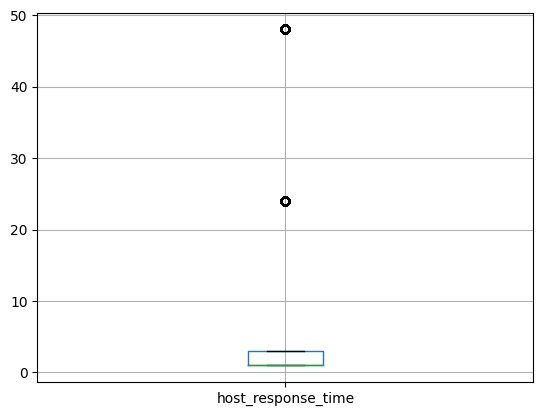

In [ ]:
# Outlier boxplot
df2.boxplot(column=['host_response_time'])

<Axes: >

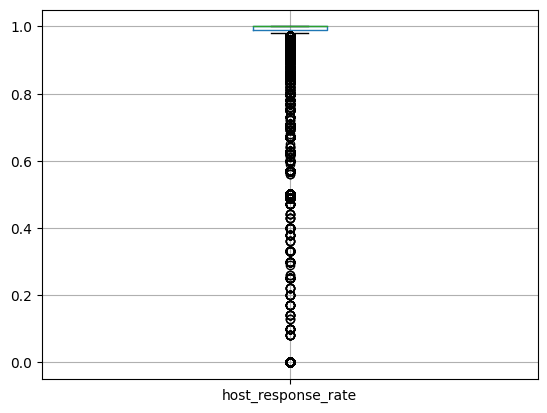

In [ ]:
# Outlier boxplot
df2.boxplot(column=['host_response_rate'])

<Axes: >

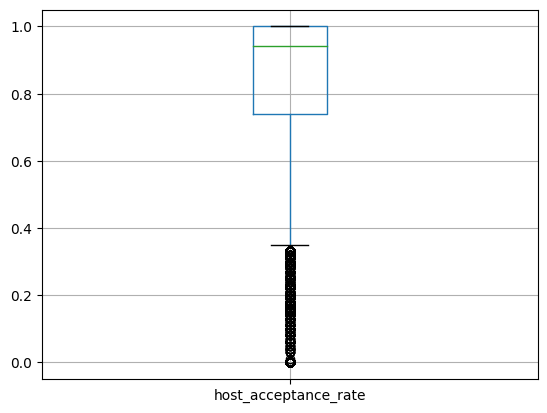

In [ ]:
# Outlier boxplot
df2.boxplot(column=['host_acceptance_rate'])

<Axes: >

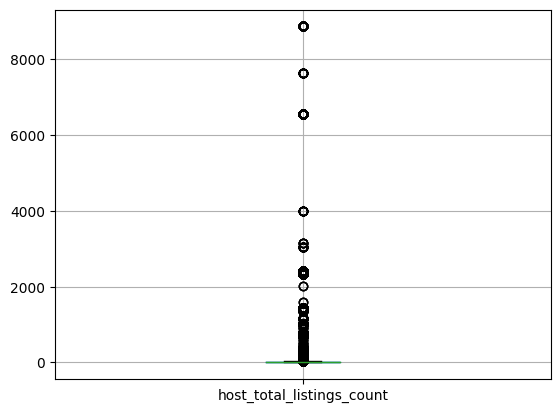

In [ ]:
# Outlier boxplot
df2.boxplot(column=['host_total_listings_count'])

<Axes: >

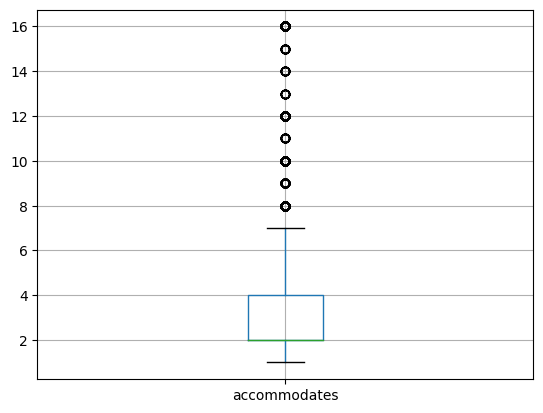

In [ ]:
# Outlier boxplot
df2.boxplot(column=['accommodates'])

<Axes: >

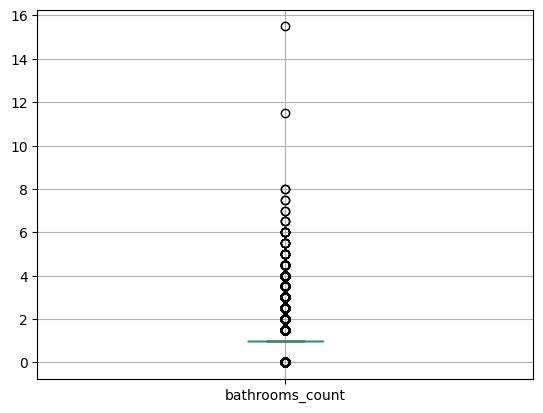

In [ ]:
# Outlier boxplot
df2.boxplot(column=['bathrooms_count'])

<Axes: >

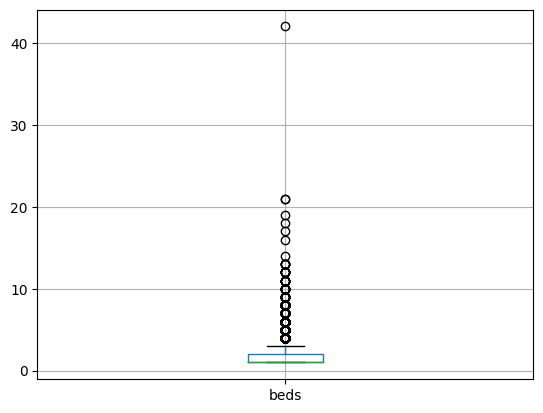

In [ ]:
# Outlier boxplot
df2.boxplot(column=['beds'])

<Axes: >

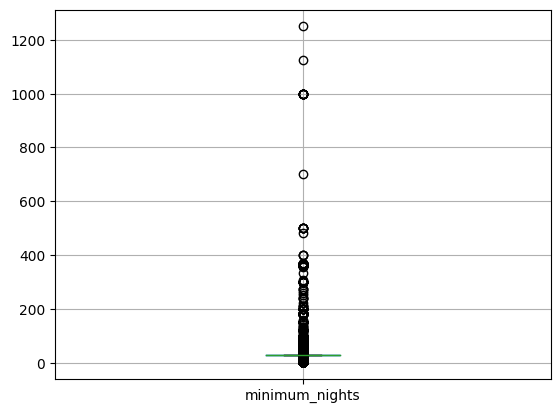

In [ ]:
# Outlier boxplot
df2.boxplot(column=['minimum_nights'])

<Axes: >

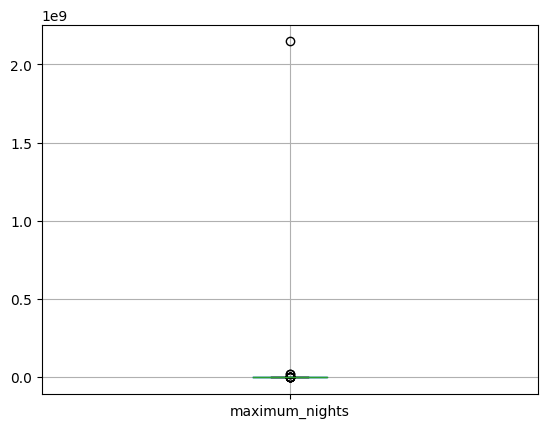

In [ ]:
# Outlier boxplot
df2.boxplot(column=['maximum_nights'])

<Axes: >

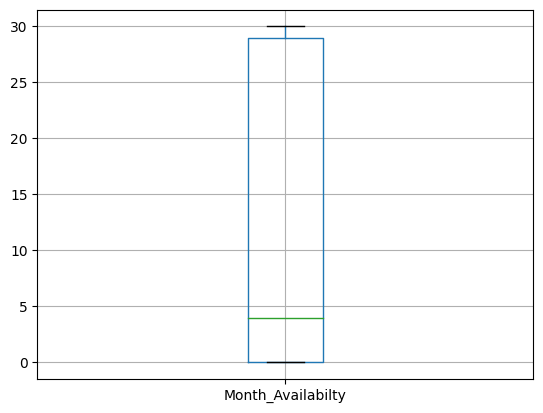

In [ ]:
# Outlier boxplot
df2.boxplot(column=['Month_Availabilty'])

<Axes: >

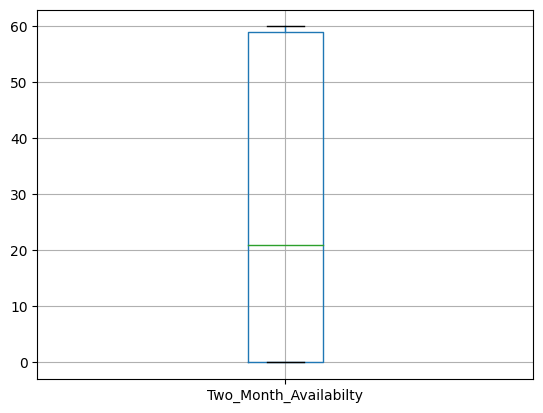

In [ ]:
# Outlier boxplot
df2.boxplot(column=['Two_Month_Availabilty'])

<Axes: >

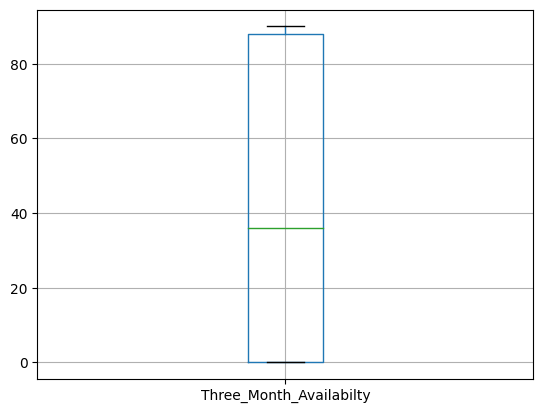

In [ ]:
# Outlier boxplot
df2.boxplot(column=['Three_Month_Availabilty'])

<Axes: >

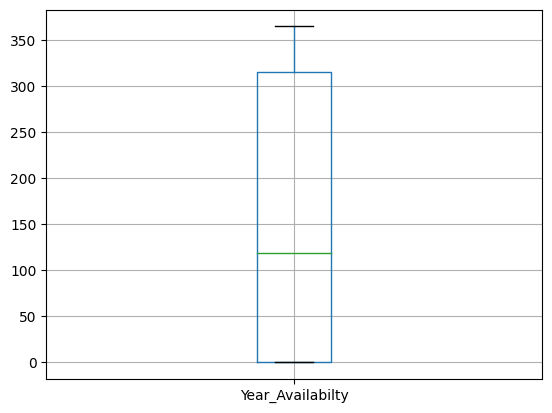

In [ ]:
# Outlier boxplot
df2.boxplot(column=['Year_Availabilty'])

<Axes: >

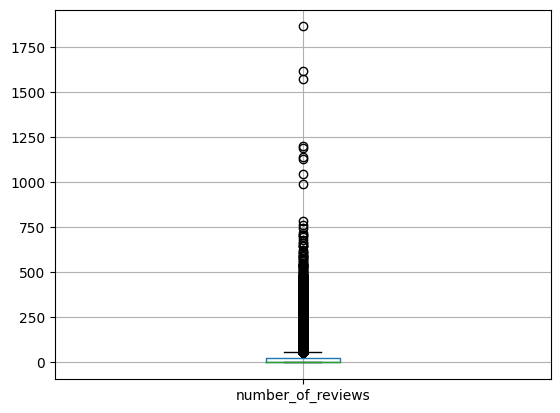

In [ ]:
# Outlier boxplot
df2.boxplot(column=['number_of_reviews'])

<Axes: >

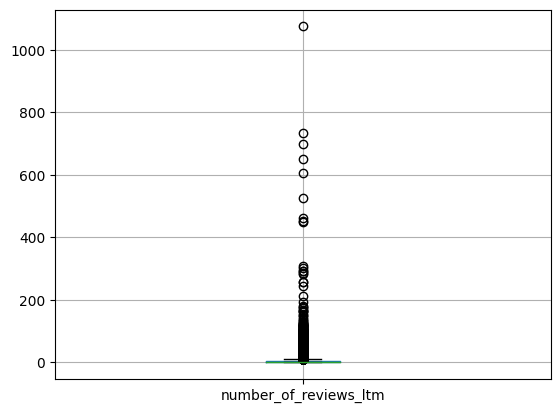

In [ ]:
# Outlier boxplot
df2.boxplot(column=['number_of_reviews_ltm'])

<Axes: >

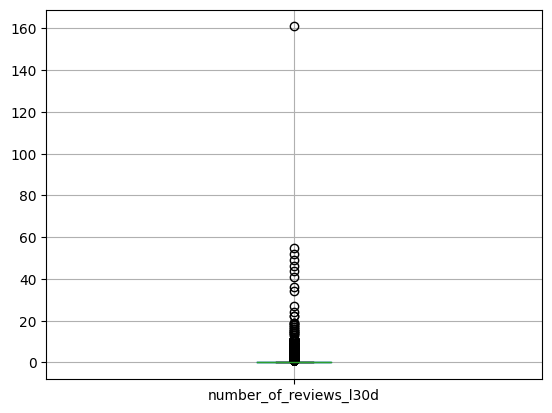

In [ ]:
# Outlier boxplot
df2.boxplot(column=['number_of_reviews_l30d'])

<Axes: >

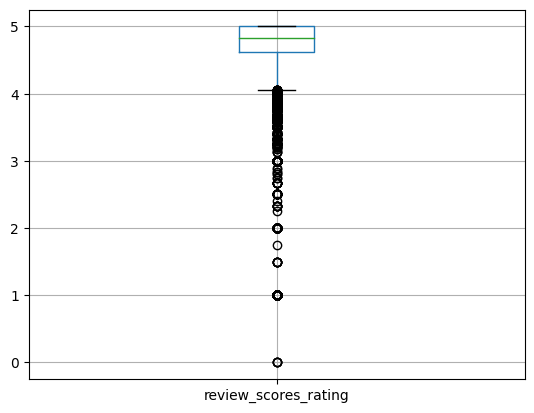

In [ ]:
# Outlier boxplot
df2.boxplot(column=['review_scores_rating'])

<Axes: >

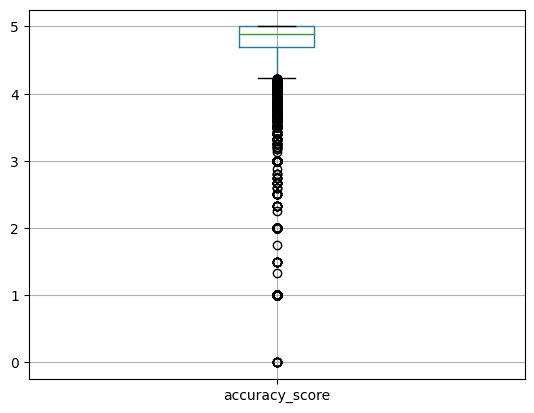

In [ ]:
# Outlier boxplot
df2.boxplot(column=['accuracy_score'])

<Axes: >

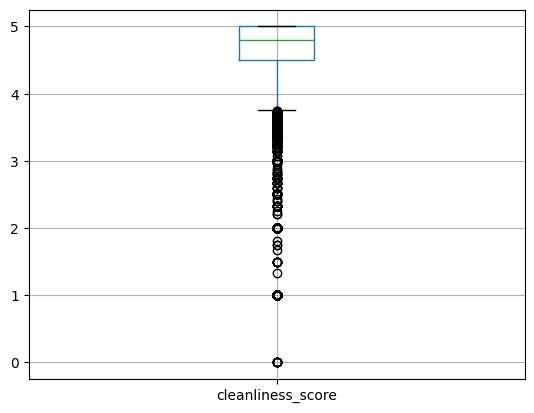

In [ ]:
# Outlier boxplot
df2.boxplot(column=['cleanliness_score'])

<Axes: >

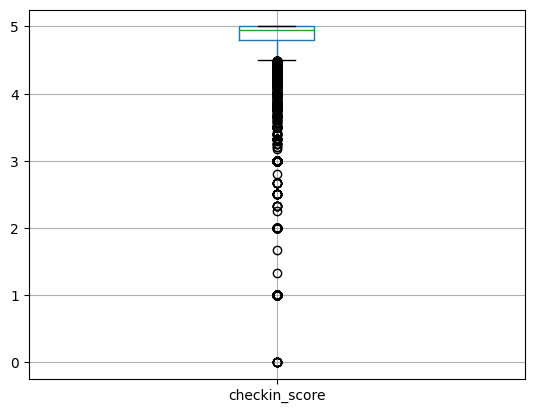

In [ ]:
# Outlier boxplot
df2.boxplot(column=['checkin_score'])

<Axes: >

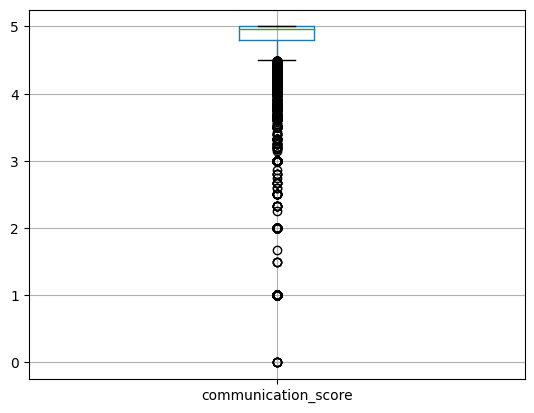

In [ ]:
# Outlier boxplot
df2.boxplot(column=['communication_score'])

<Axes: >

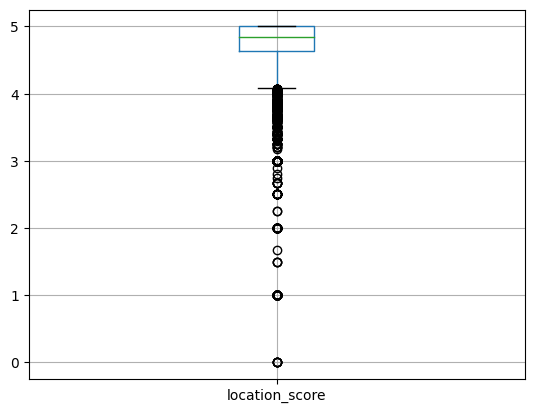

In [ ]:
# Outlier boxplot
df2.boxplot(column=['location_score'])

<Axes: >

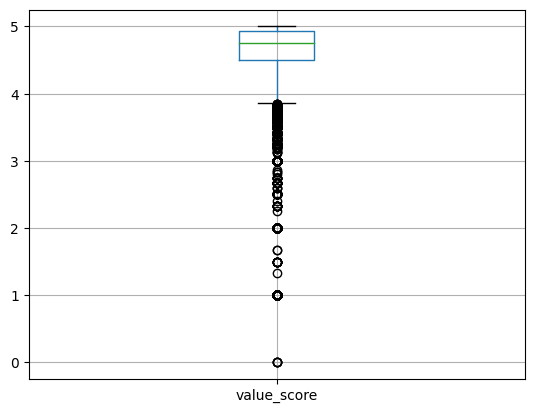

In [ ]:
# Outlier boxplot
df2.boxplot(column=['value_score'])

<Axes: >

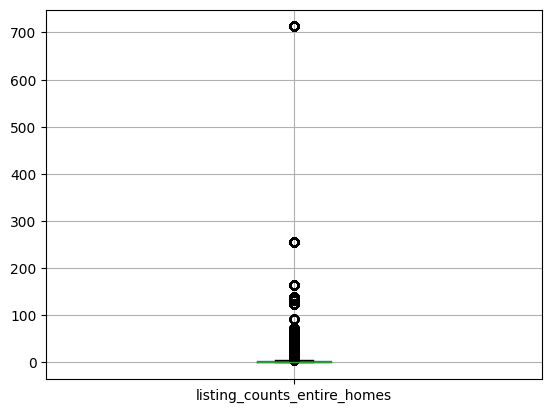

In [ ]:
# Outlier boxplot
df2.boxplot(column=['listing_counts_entire_homes'])

<Axes: >

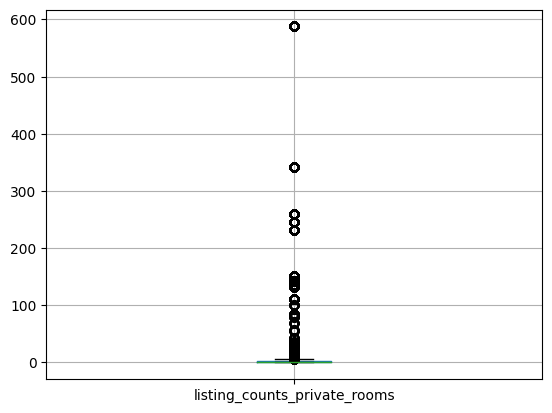

In [ ]:
# Outlier boxplot
df2.boxplot(column=['listing_counts_private_rooms'])

<Axes: >

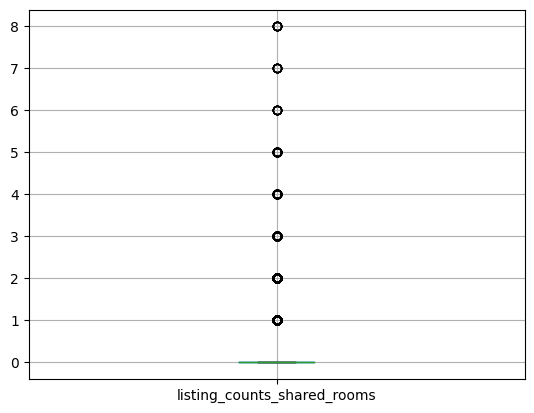

In [ ]:
# Outlier boxplot
df2.boxplot(column=['listing_counts_shared_rooms'])

<Axes: >

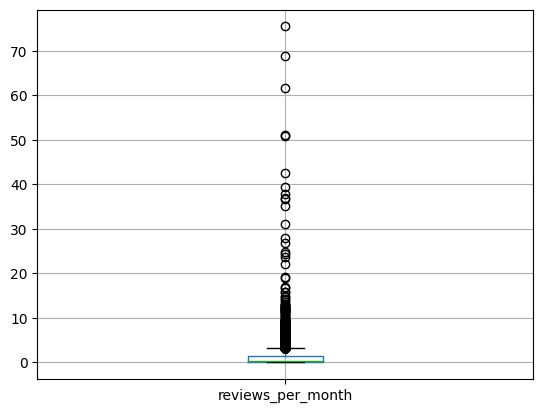

In [ ]:
# Outlier boxplot
df2.boxplot(column=['reviews_per_month'])

<Axes: >

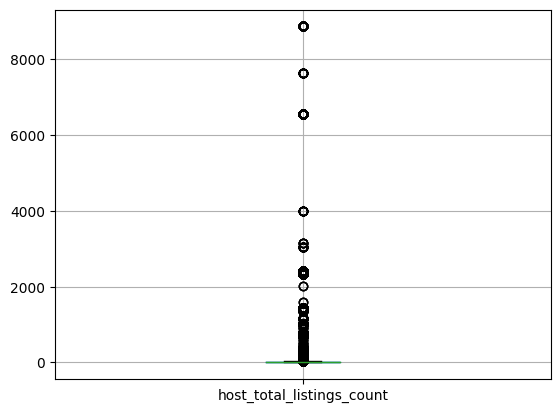

In [ ]:
# Outlier boxplot
df2.boxplot(column=['host_total_listings_count'])

##### Outlier correction methods

In [ ]:
# Find Outliers
# Function to identify outliers using IQR

#def find_outliers_iqr(df2):
#Q1 = df2.quantile(0.25)
#Q3 = df2.quantile(0.75)
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#outliers = (df2 < lower_bound) | (df2 > upper_bound)
#return outliers

# Identify outliers
#outliers = find_outliers_iqr(df2)

# Get outlier data
#outlier_df2 = df2[outliers.any(axis=1)]

#outlier_df2

In [ ]:
# Identify outliers using Z-score
#z_scores = np.abs((df2 - df2.mean()) / df2.std())
#threshold = 3
#outliers2 = df2[(z_scores > threshold).any(axis=1)]

# Remove outliers
#clean_df = df2[(z_scores <= threshold).all(axis=1)]

# Replace outliers with NaN
#df2_clipped = df2.clip(lower=df.quantile(0.05), upper=df.quantile(0.95), axis=1)

# Replace outliers with mean
#df2_mean_replaced = df2.mask(z_scores > threshold, df2.mean(), axis=1)

# Replace outliers with median
#df2_median_replaced = df2.mask(z_scores > threshold, df2.median(), axis=1)

### Final Datasets



Target variables we will explore: PRICE and REVIEW RATING SCORE

In [ ]:
# Price Target Dataframe
# Review Rating Score Dataframe

In [ ]:
# Dataset without missing value and outlier handling
# df2
# Dataset with all missing values removed
# df3 - BASELINE USE FOR DATA EXPLORATION AND PRELIMINARY MODELING

# Remove outliers
#clean_df = df2[(z_scores <= threshold).all(axis=1)]

# Replace outliers with NaN
#df2_clipped = df2.clip(lower=df.quantile(0.05), upper=df.quantile(0.95), axis=1)

# Replace outliers with mean
#df2_mean_replaced = df2.mask(z_scores > threshold, df2.mean(), axis=1)

# Replace outliers with median
#df2_median_replaced = df2.mask(z_scores > threshold, df2.median(), axis=1)


## Data Exploration

### Data exploration has been done in Tableau. Will include with final documentation.

Data Source: Kaggle

In [ ]:
df3

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,property_type,...,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,listing_counts_entire_homes,listing_counts_private_rooms,listing_counts_shared_rooms,reviews_per_month
29,2015-12-16,48.0,0.49,0.35,0.0,139.0,157.0,1.0,Manhattan,Entire rental unit,...,4.78,4.56,4.33,5.00,4.44,0,139,0,0,0.24
44,2023-07-30,1.0,1.00,1.00,0.0,1.0,1.0,1.0,Manhattan,Entire rental unit,...,4.00,4.00,4.67,4.33,3.83,0,1,0,0,1.67
47,2016-03-03,3.0,0.99,0.80,0.0,171.0,324.0,1.0,Manhattan,Entire condo,...,4.55,5.00,4.55,4.82,4.55,0,133,0,0,0.24
62,2015-12-16,48.0,0.49,0.35,0.0,139.0,157.0,1.0,Manhattan,Entire rental unit,...,4.67,4.33,3.67,4.67,4.33,0,139,0,0,0.10
64,2015-12-16,48.0,0.49,0.35,0.0,139.0,157.0,1.0,Manhattan,Entire rental unit,...,4.60,4.60,4.10,4.80,4.30,0,139,0,0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39709,2015-12-16,48.0,0.49,0.35,0.0,139.0,157.0,1.0,Manhattan,Entire rental unit,...,4.00,4.67,3.33,5.00,4.67,0,139,0,0,0.09
39710,2020-02-07,3.0,1.00,1.00,0.0,10.0,12.0,1.0,Manhattan,Private room in rental unit,...,1.00,5.00,4.00,3.00,3.00,1,0,9,0,0.86
39713,2018-04-27,24.0,1.00,0.88,0.0,1.0,2.0,0.0,Manhattan,Private room in rental unit,...,4.77,4.70,4.73,4.72,4.70,0,0,1,0,1.81
39716,2017-12-17,1.0,1.00,0.85,0.0,1.0,1.0,1.0,Manhattan,Entire rental unit,...,5.00,5.00,5.00,5.00,5.00,0,1,0,0,0.91


### Summary Stats

In [ ]:
summary_stats = df3.describe()
summary_stats

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bathrooms_count,beds,...,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,listing_counts_entire_homes,listing_counts_private_rooms,listing_counts_shared_rooms,reviews_per_month
count,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,...,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000
mean,6.038980,0.937362,0.847369,0.418931,70.491582,111.708348,0.918198,3.008103,1.190150,1.753755,...,4.661363,4.811175,4.790432,4.720896,4.588217,0.250297,16.011317,10.000629,0.057143,1.398947
std,11.294594,0.182062,0.225557,0.493401,441.890636,670.156047,0.274073,2.060478,0.490436,1.216560,...,0.492514,0.384874,0.439289,0.388361,0.517187,0.433199,69.496504,48.879631,0.394462,2.137542
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,0.990000,0.800000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,4.560000,4.790000,4.780000,4.620000,4.500000,0.000000,0.000000,0.000000,0.000000,0.240000
50%,1.000000,1.000000,0.950000,0.000000,3.000000,5.000000,1.000000,2.000000,1.000000,1.000000,...,4.810000,4.930000,4.940000,4.820000,4.730000,0.000000,1.000000,0.000000,0.000000,0.760000
75%,3.000000,1.000000,1.000000,1.000000,10.000000,15.000000,1.000000,4.000000,1.000000,2.000000,...,4.980000,5.000000,5.000000,5.000000,4.880000,1.000000,3.000000,3.000000,0.000000,2.010000
max,48.000000,1.000000,1.000000,1.000000,4883.000000,8875.000000,1.000000,16.000000,11.500000,21.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,713.000000,588.000000,6.000000,75.490000


#### Target Variables

In [ ]:
summary_stats_review_score_rating = df3['review_scores_rating'].describe()
summary_stats_review_score_rating

count    14315.000000
mean         4.701725
std          0.463122
min          1.000000
25%          4.630000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

In [ ]:
summary_stats_price = df3['price'].describe()
summary_stats_price

count    14315.000000
mean       167.515403
std        208.747384
min         10.000000
25%         78.000000
50%        121.000000
75%        194.000000
max       7590.000000
Name: price, dtype: float64

### Important Input Variables

In [ ]:
summary_stats_imprt = df3[['communication_score', 'location_score', 'checkin_score', 'reviews_per_month','host_response_time', 'accommodates', 'bathrooms_count', 'beds', 'number_of_reviews']].describe()
summary_stats_imprt

,communication_score,location_score,checkin_score,reviews_per_month,host_response_time,accommodates,bathrooms_count,beds,number_of_reviews
count,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000,14315.000000
mean,4.790432,4.720896,4.811175,1.398947,6.038980,3.008103,1.190150,1.753755,45.391757
std,0.439289,0.388361,0.384874,2.137542,11.294594,2.060478,0.490436,1.216560,79.259129
min,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,4.780000,4.620000,4.790000,0.240000,1.000000,2.000000,1.000000,1.000000,4.000000
50%,4.940000,4.820000,4.930000,0.760000,1.000000,2.000000,1.000000,1.000000,15.000000
75%,5.000000,5.000000,5.000000,2.010000,3.000000,4.000000,1.000000,2.000000,53.000000
max,5.000000,5.000000,5.000000,75.490000,48.000000,16.000000,11.500000,21.000000,1865.000000


### Histograms of Key Columns

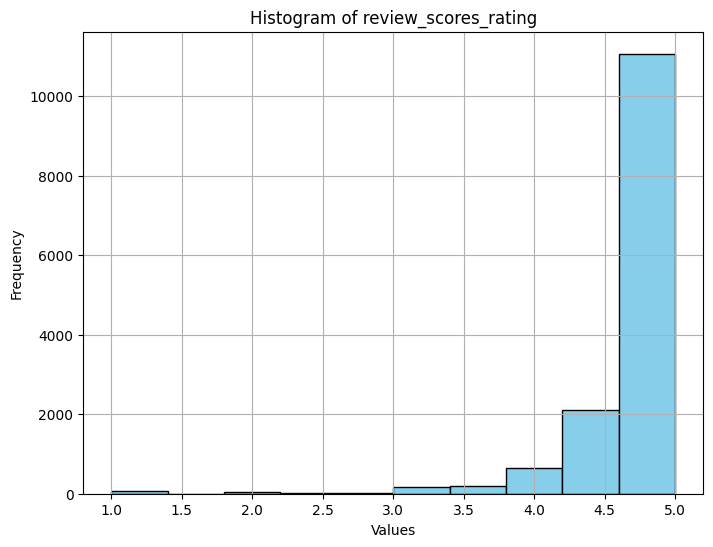

In [ ]:
# Histogram 1
hist1 = 'review_scores_rating'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist1], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist1))
plt.grid(True)
plt.show()

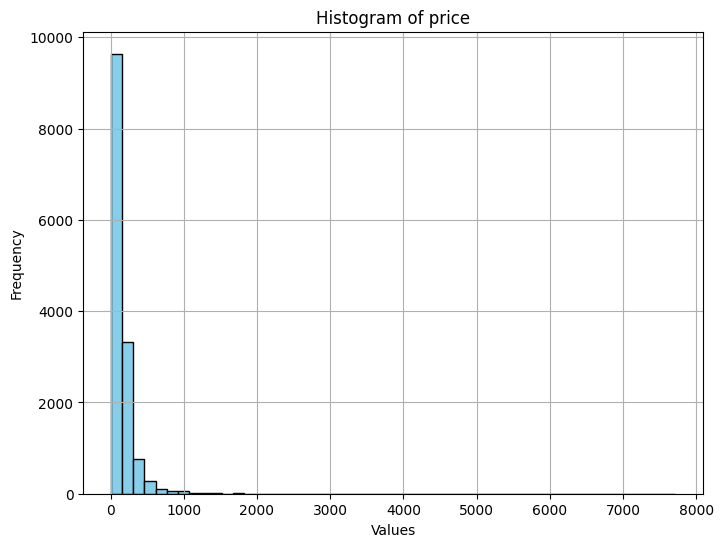

In [ ]:
# Histogram 2
hist2 = 'price'

# Define the range and bins for the histogram
min_value = df3[hist2].min()
max_value = df3[hist2].max()
bin_width = (max_value - min_value) / 50  # Adjust the number of bins here, e.g., divide by 10 for more bins

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist2], bins=range(int(min_value), int(max_value) + int(bin_width), int(bin_width)), color='skyblue', edgecolor='black')  # Adjust the colors and properties as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist2))
plt.grid(True)
plt.show()

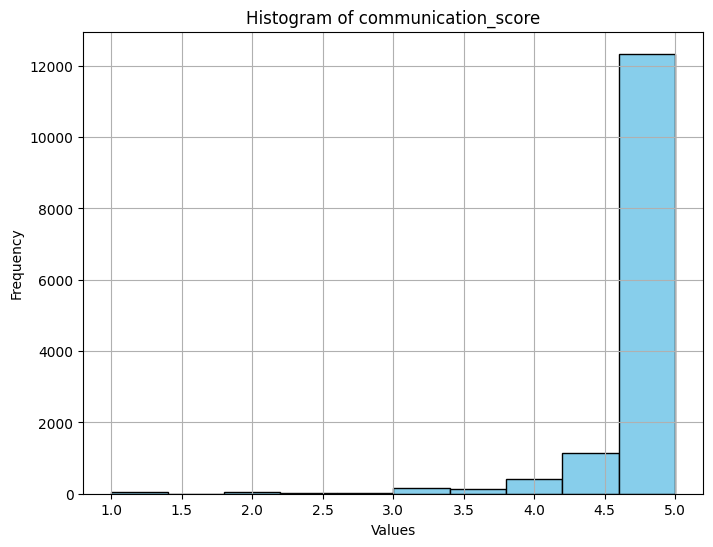

In [ ]:
# Histogram 3
hist3 = 'communication_score'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist3], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist3))
plt.grid(True)
plt.show()

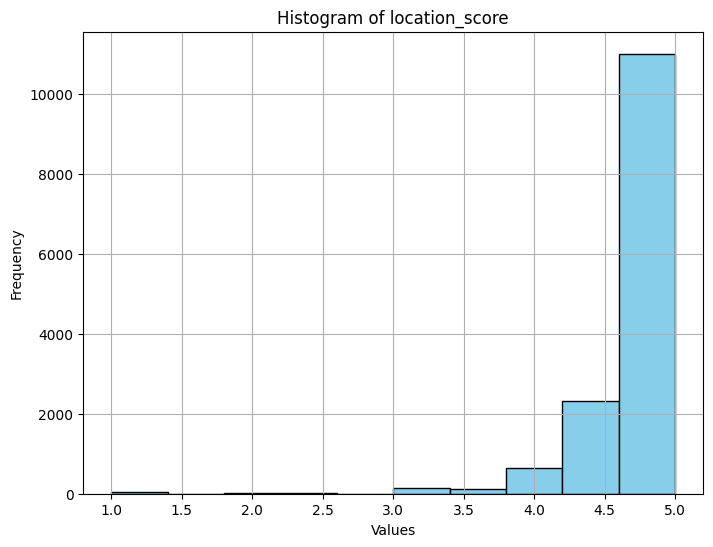

In [ ]:
# Histogram 4
hist4 = 'location_score'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist4], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist4))
plt.grid(True)
plt.show()

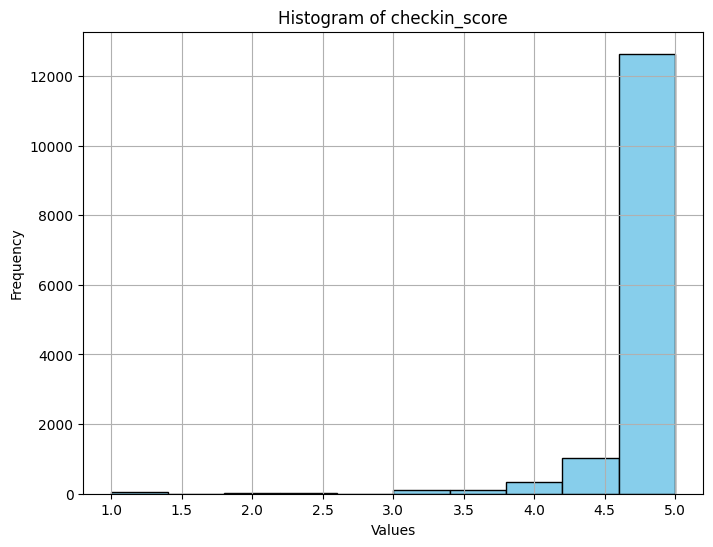

In [ ]:
# Histogram 5
hist5 = 'checkin_score'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist5], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist5))
plt.grid(True)
plt.show()

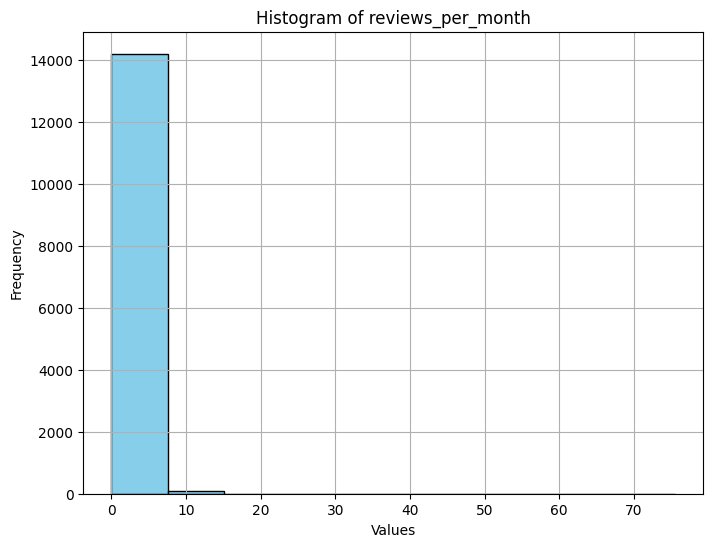

In [ ]:
# Histogram 6
hist6 = 'reviews_per_month'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist6], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist6))
plt.grid(True)
plt.show()

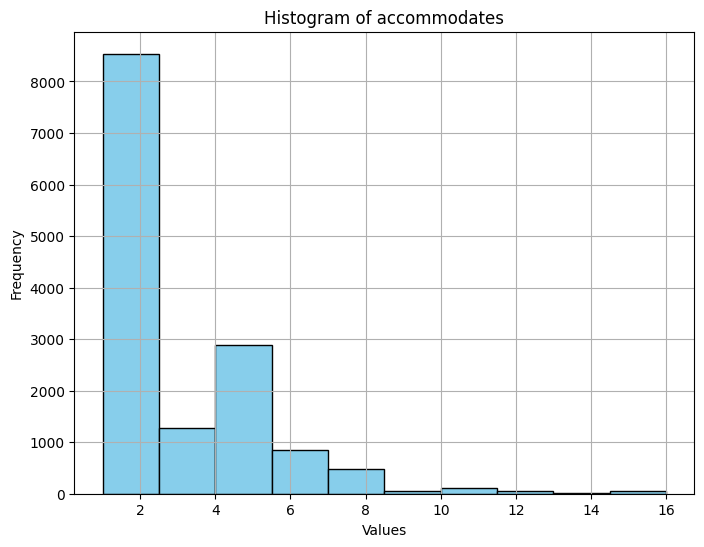

In [ ]:
# Histogram 7
hist7 = 'accommodates'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist7], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist7))
plt.grid(True)
plt.show()

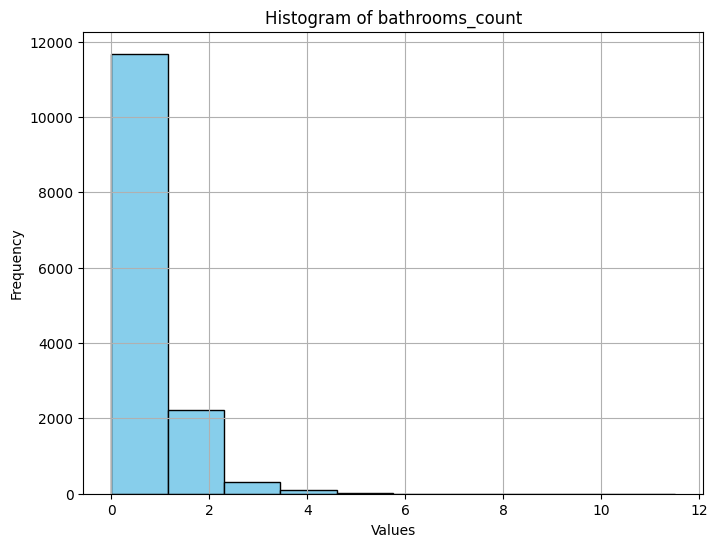

In [ ]:
# Histogram 8
hist8 = 'bathrooms_count'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist8], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist8))
plt.grid(True)
plt.show()

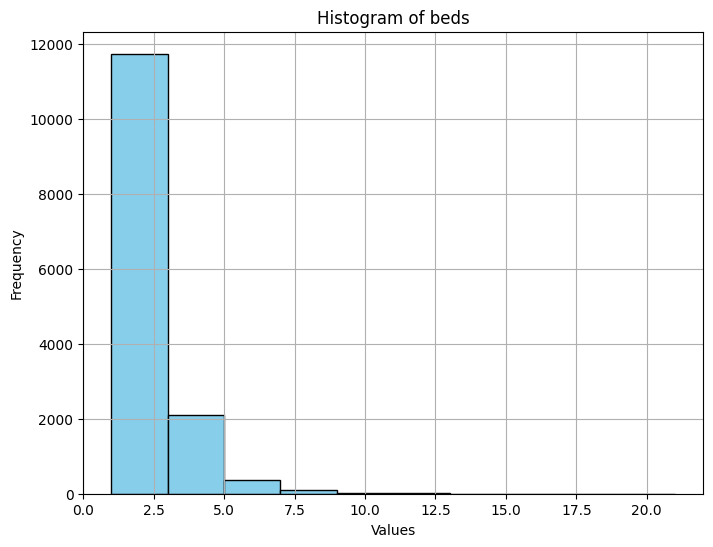

In [ ]:
# Histogram 9
hist9 = 'beds'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist9], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist9))
plt.grid(True)
plt.show()

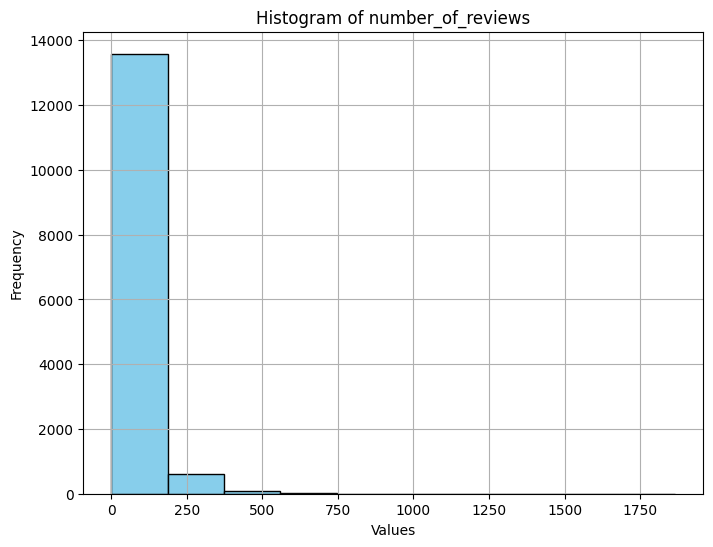

In [ ]:
# Histogram 10
hist10 = 'number_of_reviews'

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.hist(df3[hist10], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins and colors as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(hist10))
plt.grid(True)
plt.show()

##  Machine Learning & Modeling

### Review Score Rating As The Target Variable

#### Baseline: All Missing Values Removed

##### Additional Preprocessing

In [ ]:
# Additional conversions for df3
# Convert 'host_since' to datetime
df3['host_since'] = pd.to_datetime(df3['host_since'])

# Convert 'first_review' and 'last_review' to datetime
df3['first_review'] = pd.to_datetime(df3['first_review'])
df3['last_review'] = pd.to_datetime(df3['last_review'])

# Convert categorical columns to categorical dtype
categorical_cols = ['neighbourhood', 'property_type', 'room_type']
for col in categorical_cols:
    df3[col] = df3[col].astype('category')

<ipython-input-93-5cf76a501b21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['host_since'] = pd.to_datetime(df3['host_since'])
<ipython-input-93-5cf76a501b21>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['first_review'] = pd.to_datetime(df3['first_review'])
<ipython-input-93-5cf76a501b21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14315 entries, 29 to 39718
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   host_since                    14315 non-null  datetime64[ns]
 1   host_response_time            14315 non-null  float64       
 2   host_response_rate            14315 non-null  float64       
 3   host_acceptance_rate          14315 non-null  float64       
 4   host_is_superhost             14315 non-null  float64       
 5   host_listings_count           14315 non-null  float64       
 6   host_total_listings_count     14315 non-null  float64       
 7   host_identity_verified        14315 non-null  float64       
 8   neighbourhood                 14315 non-null  category      
 9   property_type                 14315 non-null  category      
 10  room_type                     14315 non-null  category      
 11  accommodates                  14

In [ ]:
df3['review_scores_rating']

29       4.67
44       4.17
47       4.91
62       4.33
64       4.50
         ... 
39709    4.00
39710    3.00
39713    4.75
39716    5.00
39718    4.89
Name: review_scores_rating, Length: 14315, dtype: float64

In [ ]:
df3['price']

29       144.0
44       187.0
47        85.0
62       105.0
64       130.0
         ...  
39709    145.0
39710     53.0
39713     45.0
39716    115.0
39718    102.0
Name: price, Length: 14315, dtype: float64

##### Split data into training and testing

In [ ]:
# Separate the features (X) and the target variable (y)
X = df3.drop(columns=["review_scores_rating","host_since","neighbourhood","property_type","room_type", "first_review", 'last_review'])  # Features
y = df3["review_scores_rating"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (11452, 32) (11452,)
Testing set shape: (2863, 32) (2863,)


##### Linear Regression

In [ ]:
# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R^2) score
r_squared = r2_score(y_test, y_pred)
print("R-squared (R^2) score:", r_squared)

Mean Squared Error (MSE): 0.030083941542100708
Mean Absolute Error (MAE): 0.0939069282068043
R-squared (R^2) score: 0.8580129483605952


Overall, based on these evaluation metrics:

The model has a relatively low Mean Squared Error (MSE), suggesting that it makes accurate predictions with small errors.
The Mean Absolute Error (MAE) is also low, indicating that, on average, the absolute difference between the predicted and actual values is small.
The R-squared (R^2) score is relatively high, indicating that the model explains a significant portion of the variance in the target variable.
These metrics collectively suggest that regression model performs well in predicting review scores.


##### Multiple Model Analysis

The code to train Linear, Decision Trees, Random Forest, Gradient Boosting, and Support Vector Machines (SVM) regression models. Also their Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2) score. Along with the comparision on side by side.

In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae, "R^2": r_squared}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         0.030084        0.093907        0.858013
Decision Tree             0.065067        0.126392        0.692905
Random Forest             0.033435        0.089953        0.842197
Gradient Boosting         0.029965        0.091391        0.858576
Support Vector Machine    0.210429        0.239434        0.006840


Linear Regression has the lowest MSE and MAE among all models, indicating that it performs the best in terms of accuracy.
Random Forest and Gradient Boosting have similar performance to Linear Regression, with slightly higher MSE and MAE but still good R^2 scores.
Decision Tree performs slightly worse than the other models, with higher MSE and MAE but still reasonable R^2 score.
Support Vector Machine (SVM) has the highest MSE and MAE, indicating poor performance in terms of accuracy, and a negative R^2 score, which suggests that the model performs worse than simply using the mean of the target variable for prediction.
Therefore, based on these evaluations, **Linear Regression and Gradient Boosting appears to be the best models.**

##### Feature Importance

In [ ]:
# Get feature names from DataFrame columns
features = X.columns.tolist()

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
feature_importances = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_
    else:
        importances = None
    feature_importances[name] = importances

    # Print top 10 feature importances
    if importances is not None:
        print(f"Variable Importance - {name}:")
        sorted_indices = importances.argsort()[::-1]  # Sort indices in descending order
        sorted_features = [features[i] for i in sorted_indices]
        sorted_importances = importances[sorted_indices]
        for feature_name, importance in zip(sorted_features[:10], sorted_importances[:10]):  # Display only top 10
            print(f"{feature_name}: {importance}")
        print()

Variable Importance - Linear Regression:
accuracy_score: 0.2841458888140728
value_score: 0.22006003621246098
communication_score: 0.2187773820668819
cleanliness_score: 0.20813062318475276
checkin_score: 0.07800075872165746
location_score: 0.04478069030352705
host_is_superhost: 0.034371760775466276
host_identity_verified: 0.0059038918123563
instant_bookable: 0.004825611477128634
bathrooms_count: 0.003297372250216436

Variable Importance - Decision Tree:
accuracy_score: 0.6880955810887575
value_score: 0.1076407307205402
communication_score: 0.04506192527265734
cleanliness_score: 0.041049163408043945
checkin_score: 0.011103809646961048
reviews_per_month: 0.009758288723369707
location_score: 0.00911978804119851
listing_counts_entire_homes: 0.00793089085126769
price: 0.00782420028632986
number_of_reviews: 0.007333257682557837

Variable Importance - Random Forest:
accuracy_score: 0.5686615593287924
value_score: 0.21261161306682086
communication_score: 0.05042598739573986
cleanliness_score: 0

##### Residual Analysis

In [ ]:
# Calculate residuals
residuals = y_test - y_pred
residuals

31750   -0.079821
37180   -0.133609
34896   -2.701822
6252     0.053670
36354    0.115550
           ...   
6309    -0.051325
24335    0.104633
34805   -0.853461
13134    0.021912
14615    0.066093
Name: review_scores_rating, Length: 2863, dtype: float64

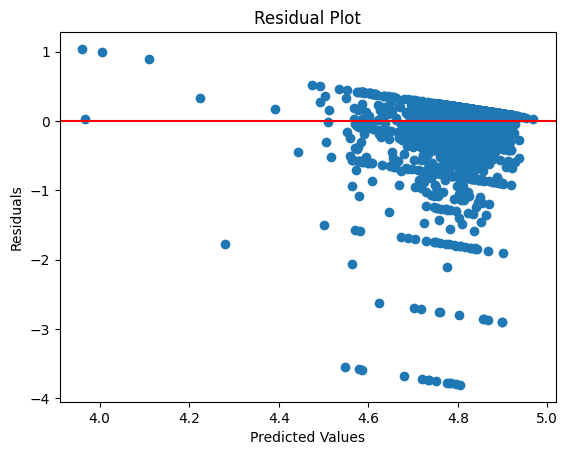

In [ ]:
# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


##### Make Predicitons

In [ ]:
# Make predictions on the test dataset
y_pred_test = linear_reg_model.predict(X_test)

# Evaluate performance on the test dataset
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Performance on Test Dataset:")
print("Mean Squared Error (MSE):", mse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R^2) score:", r2_test)

Performance on Test Dataset:
Mean Squared Error (MSE): 0.030083941542100708
Mean Absolute Error (MAE): 0.0939069282068043
R-squared (R^2) score: 0.8580129483605952


Based on these evaluations, the Linear Regression model performs well on the test dataset. The MSE and MAE are relatively low, indicating that the model's predictions are close to the actual review scores. Additionally, the high R^2 score suggests that a significant portion of the variability in review scores is explained by the features included in the model.

Overall, the Linear Regression model appears to generalize well to unseen data and is not overfitting to the training dataset.

#### Testing Different Methods (Standardization and Normalization Give Same Results because DF3 does not have missing values to scale)

In [ ]:
X.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'accommodates', 'bathrooms_count', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'Month_Availabilty', 'Two_Month_Availabilty', 'Three_Month_Availabilty',
       'Year_Availabilty', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'accuracy_score', 'cleanliness_score',
       'checkin_score', 'communication_score', 'location_score', 'value_score',
       'instant_bookable', 'listing_counts_entire_homes',
       'listing_counts_private_rooms', 'listing_counts_shared_rooms',
       'reviews_per_month'],
      dtype='object')

In [ ]:
# Selecting Columns
# Separate the features (X) and the target variable (y)
Xt1 = df3[['communication_score', 'location_score', 'checkin_score', 'price', 'reviews_per_month','host_response_time', 'accommodates', 'bathrooms_count', 'beds', 'number_of_reviews']] # Features
yt1 = df3["review_scores_rating"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_traint1, X_testt1, y_traint1, y_testt1 = train_test_split(Xt1, yt1, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_traint1.shape, y_traint1.shape)
print("Testing set shape:", X_testt1.shape, y_testt1.shape)

Training set shape: (11452, 10) (11452,)
Testing set shape: (2863, 10) (2863,)


In [ ]:
# Define models
modelst1 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
resultst1 = {}
feature_importancest1 = {}
for name, modelt1 in modelst1.items():
    modelt1.fit(X_traint1, y_traint1)
    y_predt1 = modelt1.predict(X_testt1)
    mset1 = mean_squared_error(y_testt1, y_predt1)
    maet1 = mean_absolute_error(y_testt1, y_predt1)
    r_squaredt1 = r2_score(y_testt1, y_predt1)
    resultst1[name] = {"MSE": mset1, "MAE": maet1, "R^2": r_squaredt1}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in resultst1.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         0.063382        0.146710        0.700854
Decision Tree             0.143837        0.191670        0.321131
Random Forest             0.072532        0.149654        0.657669
Gradient Boosting         0.064956        0.144251        0.693427
Support Vector Machine    0.205985        0.235895        0.027812


In [ ]:
# Get feature names from DataFrame columns
featurest1 = Xt1.columns.tolist()

# Train and evaluate each model
resultst1 = {}
feature_importancest1 = {}

for name, modelt1 in modelst1.items():
    # Train the model
    modelt1.fit(X_traint1, y_traint1)

    # Get feature importances
    if hasattr(modelt1, 'feature_importances_'):
        importancest1 = modelt1.feature_importances_
    elif hasattr(modelt1, 'coef_'):
        importancest1 = modelt1.coef_
    else:
        importancest1 = None
    feature_importancest1[name] = importancest1

    # Print top 10 feature importances
    if importancest1 is not None:
        print(f"Variable Importance - {name}:")
        sorted_indicest1 = importancest1.argsort()[::-1]  # Sort indices in descending order
        sorted_featurest1 = [featurest1[i] for i in sorted_indicest1]
        sorted_importancest1 = importancest1[sorted_indicest1]
        for feature_name, importancet1 in zip(sorted_featurest1[:10], sorted_importancest1[:10]):  # Display only top 10
            print(f"{feature_name}: {importancet1}")  # Changed importance to importancet1
        print()

Variable Importance - Linear Regression:
communication_score: 0.5568036060173922
checkin_score: 0.2827405869723918
location_score: 0.2294917457674063
bathrooms_count: 0.015506054216797122
reviews_per_month: 0.004446448992866919
beds: 0.0028634515197676737
host_response_time: 7.27978151563195e-05
price: 5.1126575866783375e-05
number_of_reviews: -5.473376264850116e-05
accommodates: -0.005677217143514331

Variable Importance - Decision Tree:
communication_score: 0.6187845480856164
checkin_score: 0.07921052712614374
reviews_per_month: 0.07544691803075146
price: 0.07163841989631588
location_score: 0.054083857078932096
accommodates: 0.02589605926763399
host_response_time: 0.024464768540192753
number_of_reviews: 0.02315578594224012
bathrooms_count: 0.015923614554223503
beds: 0.011395501477950053

Variable Importance - Random Forest:
communication_score: 0.6212922330021651
checkin_score: 0.07796252828965797
price: 0.07473312475208595
reviews_per_month: 0.06938627585163322
location_score: 0.064

##### Standardization

In [ ]:
# Impute Missing Values : Standardization
# Slide 43: Standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_stdt1 = stdsc.fit_transform(X_traint1)
X_test_stdt1 = stdsc.transform(X_testt1)

In [ ]:
# Modeling : Standardization
# Define models
modelst2 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
resultst2 = {}
feature_importancest2 = {}
for name, modelt2 in modelst2.items():
    modelt2.fit(X_train_stdt1, y_traint1)
    y_predt2 = modelt2.predict(X_test_stdt1)
    mset2 = mean_squared_error(y_testt1, y_predt1)
    maet2 = mean_absolute_error(y_testt1, y_predt1)
    r_squaredt2 = r2_score(y_testt1, y_predt2)
    resultst2[name] = {"MSE": mset2, "MAE": maet2, "R^2": r_squaredt2}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in resultst2.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         0.205985        0.235895        0.700854
Decision Tree             0.205985        0.235895        0.313587
Random Forest             0.205985        0.235895        0.654087
Gradient Boosting         0.205985        0.235895        0.692864
Support Vector Machine    0.205985        0.235895        0.664534


##### Normalization

In [ ]:
# Impute Missing Values :  Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_normt2 = mms.fit_transform(X_traint1)
X_test_normt2 = mms.transform(X_testt1)

In [ ]:
# Modeling : Normalization
# Define models
modelst3 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
resultst3 = {}
feature_importancest3 = {}
for name, modelt3 in modelst3.items():
    modelt3.fit(X_train_normt2, y_traint1)
    y_predt3 = modelt3.predict(X_test_normt2)
    mset3 = mean_squared_error(y_testt1, y_predt3)
    maet3 = mean_absolute_error(y_testt1, y_predt3)
    r_squaredt3 = r2_score(y_testt1, y_predt3)
    resultst3[name] = {"MSE": mset3, "MAE": maet3, "R^2": r_squaredt3}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in resultst3.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         0.063382        0.146710        0.700854
Decision Tree             0.143444        0.193007        0.322990
Random Forest             0.074098        0.151243        0.650279
Gradient Boosting         0.064993        0.144290        0.693252
Support Vector Machine    0.062361        0.145959        0.705676


#### Using Important Features From DF3(all missing values removed) & Applying DF2 To Modeling

In [ ]:
df2.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood,property_type,...,cleanliness_score,checkin_score,communication_score,location_score,value_score,instant_bookable,listing_counts_entire_homes,listing_counts_private_rooms,listing_counts_shared_rooms,reviews_per_month
0,2013-03-13,NaN,NaN,NaN,0.0,1.0,3.0,1.0,Manhattan,Entire rental unit,...,4.8,5.0,4.8,5.0,4.4,0,1,0,0,0.20
1,2016-07-12,NaN,NaN,1.0,0.0,1.0,2.0,1.0,Brooklyn,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
2,2014-11-09,NaN,NaN,NaN,0.0,1.0,1.0,1.0,Manhattan,Entire rental unit,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,NaN
3,2015-09-08,NaN,NaN,NaN,0.0,1.0,2.0,1.0,Manhattan,Private room in rental unit,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,NaN
4,2013-04-14,NaN,NaN,NaN,0.0,1.0,5.0,1.0,Brooklyn,Entire rental unit,...,5.0,5.0,5.0,5.0,5.0,0,1,0,0,0.01


In [ ]:
# Additional conversions for df3
# Convert 'host_since' to datetime
df2['host_since'] = pd.to_datetime(df2['host_since'])

# Convert 'first_review' and 'last_review' to datetime
df2['first_review'] = pd.to_datetime(df2['first_review'])
df2['last_review'] = pd.to_datetime(df2['last_review'])

# Convert categorical columns to categorical dtype
categorical_cols = ['neighbourhood', 'property_type', 'room_type']
for col in categorical_cols:
    df2[col] = df2[col].astype('category')

In [ ]:
# drop cols
drp2 = df2.drop(columns=["host_since","neighbourhood","property_type","room_type", "first_review", 'last_review'])

In [ ]:
# Selecting Columns
# Separate the features (X) and the target variable (y)
X9 = drp2[['communication_score', 'location_score', 'checkin_score', 'price', 'reviews_per_month','host_response_time', 'accommodates', 'bathrooms_count', 'beds', 'number_of_reviews']] # Features
y9 = drp2["review_scores_rating"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train9.shape, y_train9.shape)
print("Testing set shape:", X_test9.shape, y_test9.shape)

Training set shape: (31775, 10) (31775,)
Testing set shape: (7944, 10) (7944,)


In [ ]:
# Impute Missing Values : Standardization
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define a pipeline with SimpleImputer and StandardScaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale the features
])
X_train_std9 = stdsc.fit_transform(X_train9)
X_test_std9 = stdsc.transform(X_test9)

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training set
X_train_std9 = imputer.fit_transform(X_train_std9)

# Transform the test set (using the same imputer instance)
X_test_std9 = imputer.transform(X_test_std9)

In [ ]:
print("NaN values in X_train_std9:", np.isnan(X_train_std9).sum())
print("NaN values in X_test_std9:", np.isnan(X_test_std9).sum())

NaN values in X_train_std9: 0
NaN values in X_test_std9: 0


In [ ]:
from sklearn.impute import SimpleImputer

y_train9_np = y_train9.values
y_test9_np = y_test9.values

# Initialize SimpleImputer with strategy 'mean' for y
imputer_y = SimpleImputer(strategy='mean')

# Fit and transform y_train9
y_train9_imputed = imputer_y.fit_transform(y_train9_np.reshape(-1, 1))

# Transform y_test9 (using the same imputer instance)
y_test9_imputed = imputer_y.transform(y_test9_np.reshape(-1, 1))

In [ ]:
# Define models
models9 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results9 = {}
for name, model9 in models9.items():
    model9.fit(X_train_std9, y_train9_imputed)
    y_pred9 = model9.predict(X_test_std9)
    mse9 = mean_squared_error(y_test9_imputed, y_pred9)
    mae9 = mean_absolute_error(y_test9_imputed, y_pred9)
    r_squared9 = r2_score(y_test9_imputed, y_pred9)
    results9[name] = {"MSE": mse9, "MAE": mae9, "R^2": r_squared9}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results9.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

<ipython-input-120-783cfed3204b>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model9.fit(X_train_std9, y_train9_imputed)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         0.068219        0.121562        0.581367
Decision Tree             0.115332        0.150407        0.292257
Random Forest             0.070380        0.120901        0.568110
Gradient Boosting         0.065897        0.118983        0.595621
Support Vector Machine    0.070619        0.131373        0.566639


#### Testing Different Price Segments

We want to see what impact different price ranges have on review scores.

In [ ]:
df3['price'].describe()

count    14315.000000
mean       167.515403
std        208.747384
min         10.000000
25%         78.000000
50%        121.000000
75%        194.000000
max       7590.000000
Name: price, dtype: float64

In [ ]:
# Create segments for different price ranges
# Create DataFrame where price is less than 167
df_less_than_167 = df3[df3['price'] < 167]

# Create DataFrame where price is greater than 167
df_greater_than_167 = df3[df3['price'] > 167]

##### Price is less than the Mean Price of 167

In [ ]:
# Selecting Columns
# Separate the features (X) and the target variable (y)
X_p = df_less_than_167[['communication_score', 'location_score', 'checkin_score', 'price', 'reviews_per_month','host_response_time', 'accommodates', 'bathrooms_count', 'beds', 'number_of_reviews']] # Features
y_p = df_less_than_167["review_scores_rating"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train_p.shape, y_train_p.shape)
print("Testing set shape:", X_test_p.shape, y_test_p.shape)

Training set shape: (7874, 10) (7874,)
Testing set shape: (1969, 10) (1969,)


In [ ]:
## Define models
models_p = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results_p = {}
for name, model_p in models_p.items():
    model_p.fit(X_train_p, y_train_p)
    y_pred_p = model_p.predict(X_test_p)
    mse_p = mean_squared_error(y_test_p, y_pred_p)
    mae_p = mean_absolute_error(y_test_p, y_pred_p)
    r_squared_p = r2_score(y_test_p, y_pred_p)
    results_p[name] = {"MSE": mse_p, "MAE": mae_p, "R^2": r_squared_p}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results_p.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         0.061303        0.148210        0.706821
Decision Tree             0.153977        0.205267        0.263605
Random Forest             0.071220        0.151627        0.659392
Gradient Boosting         0.064446        0.147332        0.691786
Support Vector Machine    0.163905        0.221335        0.216125


##### Price is greater than the Mean Price of 167

In [ ]:
# Selecting Columns
# Separate the features (X) and the target variable (y)
X_p1 = df_greater_than_167[['communication_score', 'location_score', 'checkin_score', 'price', 'reviews_per_month','host_response_time', 'accommodates', 'bathrooms_count', 'beds', 'number_of_reviews']] # Features
y_p1 = df_greater_than_167["review_scores_rating"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train_p1, X_test_p1, y_train_p1, y_test_p1 = train_test_split(X_p1, y_p1, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train_p1.shape, y_train_p1.shape)
print("Testing set shape:", X_test_p1.shape, y_test_p1.shape)

Training set shape: (3556, 10) (3556,)
Testing set shape: (890, 10) (890,)


In [ ]:
# Define models
models_p1 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results_p1 = {}
for name, model_p1 in models_p1.items():
    model_p1.fit(X_train_p1, y_train_p1)
    y_pred_p1 = model_p1.predict(X_test_p1)
    mse_p1 = mean_squared_error(y_test_p1, y_pred_p1)
    mae_p1 = mean_absolute_error(y_test_p1, y_pred_p1)
    r_squared_p1 = r2_score(y_test_p1, y_pred_p1)
    results_p1[name] = {"MSE": mse_p1, "MAE": mae_p1, "R^2": r_squared_p1}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results_p1.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         0.055801        0.129897        0.742551
Decision Tree             0.124109        0.176315        0.427398
Random Forest             0.056408        0.135208        0.739753
Gradient Boosting         0.057044        0.133443        0.736818
Support Vector Machine    0.234902        0.230007        -0.083764


### Price As The Target Variable

#### Baseline: All Missing Values Removed

##### Split data into training and testing

In [ ]:
# Separate the features (X) and the target variable (y)
X1 = df3.drop(columns=["host_since","neighbourhood","property_type","room_type", "first_review", 'last_review','price'])  # Features
y1 = df3["price"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train1.shape, y_train1.shape)
print("Testing set shape:", X_test1.shape, y_test1.shape)


Training set shape: (11452, 32) (11452,)
Testing set shape: (2863, 32) (2863,)


##### Linear Regression

In [ ]:
# Initialize the Linear Regression model
linear_reg_model1 = LinearRegression()

# Train the model on the training data
linear_reg_model1.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred1 = linear_reg_model1.predict(X_test1)

# Evaluate the model using Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error (MSE):", mse1)

# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test1, y_pred1)
print("Mean Absolute Error (MAE):", mae1)

# Calculate R-squared (R^2) score
r_squared1 = r2_score(y_test1, y_pred1)
print("R-squared (R^2) score:", r_squared1)

Mean Squared Error (MSE): 44638.07767959001
Mean Absolute Error (MAE): 82.36474641392486
R-squared (R^2) score: 0.20652797891407915


##### Multiple Model Analysis

In [ ]:
# Define models
models1 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results1 = {}
feature_importances1 = {}
for name, model1 in models1.items():
    model1.fit(X_train1, y_train1)
    y_pred1 = model1.predict(X_test1)
    mse1 = mean_squared_error(y_test1, y_pred1)
    mae1 = mean_absolute_error(y_test1, y_pred1)
    r_squared1 = r2_score(y_test1, y_pred1)
    results1[name] = {"MSE": mse1, "MAE": mae1, "R^2": r_squared1}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results1.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         44638.077680        82.364746        0.206528
Decision Tree             52773.963413        84.293224        0.061907
Random Forest             37299.645768        66.531305        0.336974
Gradient Boosting         36730.913212        67.553188        0.347083
Support Vector Machine    58478.063157        93.041816        -0.039487


##### Feature Importance

In [ ]:
# Get feature names from DataFrame columns
features1 = X1.columns.tolist()

# Define models
models1 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results1 = {}
feature_importances1 = {}

for name, model1 in models1.items():
    # Train the model
    model1.fit(X_train1, y_train1)

    # Get feature importances
    if hasattr(model1, 'feature_importances_'):
        importances1 = model1.feature_importances_
    elif hasattr(model1, 'coef_'):  # Corrected from 'model' to 'model1'
        importances1 = model1.coef_
    else:
        importances1 = None
    feature_importances1[name] = importances1  # Corrected from 'importances' to 'importances1'

    # Print top 10 feature importances
    if importances1 is not None:
        print(f"Variable Importance - {name}:")
        sorted_indices1 = importances1.argsort()[::-1]  # Sort indices in descending order
        sorted_features1 = [features1[i] for i in sorted_indices1]
        sorted_importances1 = importances1[sorted_indices1]
        for feature_name, importance1 in zip(sorted_features1[:10], sorted_importances1[:10]):  # Display only top 10
            print(f"{feature_name}: {importance1}")  # Corrected from 'importance' to 'importance1'
        print()

Variable Importance - Linear Regression:
bathrooms_count: 87.41361980245473
has_availability: 77.72130639026295
location_score: 59.3937296159318
review_scores_rating: 32.92712148892952
cleanliness_score: 30.79723996934047
accommodates: 30.551490700720365
host_identity_verified: 23.18343642701029
instant_bookable: 16.425560453665888
host_is_superhost: 5.305560965698827
beds: 5.238086717484292

Variable Importance - Decision Tree:
accommodates: 0.15952697008862748
bathrooms_count: 0.11592615044165472
accuracy_score: 0.10064583945049044
location_score: 0.05974054196101718
minimum_nights: 0.05413507005145963
reviews_per_month: 0.0518029996161917
Year_Availabilty: 0.05090457794043932
host_acceptance_rate: 0.04815579880532594
host_total_listings_count: 0.0463070207210274
Three_Month_Availabilty: 0.045685749400883706

Variable Importance - Random Forest:
accommodates: 0.16840816977298034
bathrooms_count: 0.1234393144947583
reviews_per_month: 0.08029896665263118
number_of_reviews: 0.0700063613

##### Residual Analysis

In [ ]:
# Calculate residuals
residuals1 = y_test1 - y_pred1
residuals1

31750    108.255174
37180      9.953542
34896    -14.778339
6252     752.051089
36354     32.010505
            ...    
6309       5.430578
24335    780.629870
34805    -52.699368
13134    -73.325245
14615    -57.782491
Name: price, Length: 2863, dtype: float64

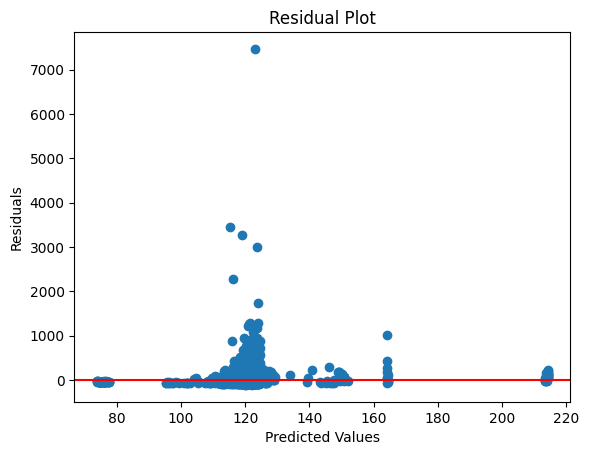

In [ ]:
# Plot residuals
plt.scatter(y_pred1, residuals1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


##### Make Predictions

In [ ]:
# Make predictions on the test dataset
y_pred_test1 = linear_reg_model1.predict(X_test1)

# Evaluate performance on the test dataset
mse_test1 = mean_squared_error(y_test1, y_pred_test1)
mae_test1 = mean_absolute_error(y_test1, y_pred_test1)
r2_test1 = r2_score(y_test1, y_pred_test1)

print("Performance on Test Dataset:")
print("Mean Squared Error (MSE):", mse_test1)
print("Mean Absolute Error (MAE):", mae_test1)
print("R-squared (R^2) score:", r2_test1)

Performance on Test Dataset:
Mean Squared Error (MSE): 44638.07767959001
Mean Absolute Error (MAE): 82.36474641392486
R-squared (R^2) score: 0.20652797891407915


#### Testing Different Methods (Standardization and Normalization shows similar results as DF3 does not have missing values)

##### Selecting Columns & Imputing Missing Values

In [ ]:
# Select Columns
# Separate the features (X) and the target variable (y)
X2 = df3[['host_identity_verified','Three_Month_Availabilty','communication_score', 'maximum_nights', 'minimum_nights','cleanliness_score', 'beds', 'number_of_reviews_ltm', 'accommodates']]  # Features
y2 = df3["price"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train2.shape, y_train2.shape)
print("Testing set shape:", X_test2.shape, y_test2.shape)

Training set shape: (11452, 9) (11452,)
Testing set shape: (2863, 9) (2863,)


##### Standardization

In [ ]:
# Impute Missing Values : Standardization
# Slide 43: Standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std2 = stdsc.fit_transform(X_train2)
X_test_std2 = stdsc.transform(X_test2)

In [ ]:
# Modeling : Standardization
# Define models
models2 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results2 = {}
feature_importances2 = {}
for name, model2 in models2.items():
    model2.fit(X_train_std2, y_train2)
    y_pred2 = model2.predict(X_test_std2)
    mse2 = mean_squared_error(y_test2, y_pred2)
    mae2 = mean_absolute_error(y_test2, y_pred2)
    r_squared2 = r2_score(y_test2, y_pred2)
    results2[name] = {"MSE": mse2, "MAE": mae2, "R^2": r_squared2}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results2.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         47086.728410        85.138316        0.163002
Decision Tree             85413.738646        110.697772        -0.518287
Random Forest             47200.442778        84.877375        0.160980
Gradient Boosting         43205.440411        80.235378        0.231994
Support Vector Machine    52295.904965        80.301692        0.070405


##### Normalization

In [ ]:
# Impute Missing Values :  Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm2 = mms.fit_transform(X_train2)
X_test_norm2 = mms.transform(X_test2)

In [ ]:
# Modeling : Normalization
# Define models
models4 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results4 = {}
feature_importances4 = {}
for name, model4 in models4.items():
    model4.fit(X_train_norm2, y_train2)
    y_pred4 = model4.predict(X_test_norm2)
    mse4 = mean_squared_error(y_test2, y_pred2)
    mae4 = mean_absolute_error(y_test2, y_pred2)
    r_squared4 = r2_score(y_test2, y_pred2)
    results4[name] = {"MSE": mse4, "MAE": mae4, "R^2": r_squared4}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results4.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         52295.904965        80.301692        0.070405
Decision Tree             52295.904965        80.301692        0.070405
Random Forest             52295.904965        80.301692        0.070405
Gradient Boosting         52295.904965        80.301692        0.070405
Support Vector Machine    52295.904965        80.301692        0.070405


#### Final Price Modeling

In [ ]:
df3.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified', 'neighbourhood',
       'property_type', 'room_type', 'accommodates', 'bathrooms_count', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'Month_Availabilty', 'Two_Month_Availabilty', 'Three_Month_Availabilty',
       'Year_Availabilty', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'accuracy_score', 'cleanliness_score',
       'checkin_score', 'communication_score', 'location_score', 'value_score',
       'instant_bookable', 'listing_counts_entire_homes',
       'listing_counts_private_rooms', 'listing_counts_shared_rooms',
       'reviews_per_month'],
      dtype='object')

In [ ]:
summary_statistics = df3["price"].describe()
print(summary_statistics)

count    14315.000000
mean       167.515403
std        208.747384
min         10.000000
25%         78.000000
50%        121.000000
75%        194.000000
max       7590.000000
Name: price, dtype: float64


In [ ]:
# Select Columns
# Separate the features (X) and the target variable (y)
X_price_final = df3[['accommodates','bathrooms_count','beds', 'maximum_nights', 'Month_Availabilty', 'number_of_reviews','instant_bookable', 'host_response_rate', 'host_identity_verified']]  # Features
y_price_final = df3["price"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_trainpf, X_testpf, y_trainpf, y_testpf = train_test_split(X_price_final, y_price_final, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_trainpf.shape, y_trainpf.shape)
print("Testing set shape:", X_testpf.shape, y_testpf.shape)

Training set shape: (11452, 9) (11452,)
Testing set shape: (2863, 9) (2863,)


In [ ]:
# Modeling :
# Define models
models5 = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
results5 = {}
feature_importances5 = {}
for name, model5 in models5.items():
    model5.fit(X_trainpf, y_trainpf)
    y_pred5 = model5.predict(X_testpf)
    mse5 = mean_squared_error(y_testpf, y_pred5)
    mae5 = mean_absolute_error(y_testpf, y_pred5)
    r_squared5 = r2_score(y_testpf, y_pred5)
    results5[name] = {"MSE": mse5, "MAE": mae5, "R^2": r_squared5}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results5.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))


Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         46066.338552        86.118002        0.181140
Decision Tree             56325.183064        100.231341        -0.001218
Random Forest             43596.111112        80.443829        0.225050
Gradient Boosting         42251.329680        78.165298        0.248954


In [ ]:
# Get feature names from DataFrame columns
features5 = X_price_final.columns.tolist()

# Define models
models5 = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

# Train and evaluate each model
results5 = {}
feature_importances5 = {}

for name, model5 in models5.items():
    # Train the model
    model5.fit(X_trainpf, y_trainpf)

    # Get feature importances
    if hasattr(model5, 'feature_importances_'):
        importances5 = model5.feature_importances_
    elif hasattr(model5, 'coef_'):
        importances5 = model5.coef_
    else:
        importances5 = None
    feature_importances5[name] = importances5

    # Print top 10 feature importances
    if importances5 is not None:  # Corrected from feature_importances5 to importances5
        print(f"Variable Importance - {name}:")
        sorted_indices5 = importances5.argsort()[::-1]  # Sort indices in descending order
        sorted_features5 = [features5[i] for i in sorted_indices5]
        sorted_importances5 = importances5[sorted_indices5]
        for feature_name, importance5 in zip(sorted_features5[:10], sorted_importances5[:10]):  # Display only top 10
            print(f"{feature_name}: {importance5}")  # Corrected from importance to importance5
        print()

Variable Importance - Linear Regression:
bathrooms_count: 85.61161599847699
accommodates: 32.49391366510131
host_identity_verified: 24.28535388665687
instant_bookable: 12.847112948640168
beds: 3.8722387626511274
Month_Availabilty: 0.8917775613816827
maximum_nights: 0.001021331079925858
number_of_reviews: -0.03276331535500798
host_response_rate: -15.212539261686004

Variable Importance - Random Forest:
number_of_reviews: 0.23795465961598689
accommodates: 0.2100677347845292
bathrooms_count: 0.14273185777856603
host_response_rate: 0.12028254985668
Month_Availabilty: 0.10260201292063101
maximum_nights: 0.10230506283613652
beds: 0.05332829383371865
instant_bookable: 0.020336167061885835
host_identity_verified: 0.010391661311865674

Variable Importance - Gradient Boosting:
accommodates: 0.41951477118109537
bathrooms_count: 0.28823496343746013
number_of_reviews: 0.14319221233229873
maximum_nights: 0.04792103586432318
beds: 0.04026636513910935
Month_Availabilty: 0.03255539193710767
host_respon

### Availability As The Target Variable

#### Month Availability

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df3['Month_Availabilty'].quantile(0.25)
Q3 = df3['Month_Availabilty'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df3['Month_Availabilty'] < lower_bound) | (df3['Month_Availabilty'] > upper_bound))
print("Indices of outliers:", outliers)


Indices of outliers: 29       False
44       False
47       False
62       False
64       False
         ...  
39709    False
39710    False
39713    False
39716    False
39718    False
Name: Month_Availabilty, Length: 14315, dtype: bool


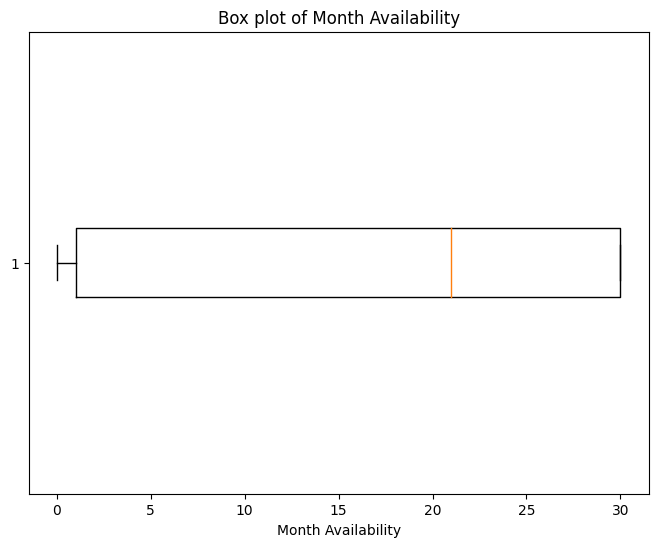

In [ ]:
import matplotlib.pyplot as plt

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df3['Month_Availabilty'], vert=False)
plt.xlabel('Month Availability')
plt.title('Box plot of Month Availability')
plt.show()


In [ ]:
# Separate the features (X) and the target variable (y)
X = df3.drop(columns=["Month_Availabilty","host_since","neighbourhood","property_type","room_type", "first_review", 'last_review'])  # Features
y = df3["Month_Availabilty"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (11452, 32) (11452,)
Testing set shape: (2863, 32) (2863,)


In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae, "R^2": r_squared}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         19.950134        3.105357        0.876503
Decision Tree             20.825358        1.686692        0.871085
Random Forest             11.319298        1.450520        0.929930
Gradient Boosting         11.090354        1.588486        0.931347
Support Vector Machine    46.281218        4.663753        0.713505


In [ ]:
# Get feature names from DataFrame columns
features = X.columns.tolist()

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
feature_importances = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_
    else:
        importances = None
    feature_importances[name] = importances

    # Print top 10 feature importances
    if importances is not None:
        print(f"Variable Importance - {name}:")
        sorted_indices = importances.argsort()[::-1]  # Sort indices in descending order
        sorted_features = [features[i] for i in sorted_indices]
        sorted_importances = importances[sorted_indices]
        for feature_name, importance in zip(sorted_features[:10], sorted_importances[:10]):  # Display only top 10
            print(f"{feature_name}: {importance}")
        print()

Variable Importance - Linear Regression:
Two_Month_Availabilty: 0.8309578398427035
host_response_rate: 0.39240216575392645
instant_bookable: 0.28414548707200693
communication_score: 0.23745241216089558
cleanliness_score: 0.17612225390128897
listing_counts_shared_rooms: 0.0838412953814214
accommodates: 0.03895169000699959
beds: 0.03329995312916387
reviews_per_month: 0.03192240242936909
host_response_time: 0.027745345895211826

Variable Importance - Decision Tree:
Two_Month_Availabilty: 0.9121311643259173
Three_Month_Availabilty: 0.022755774723391936
minimum_nights: 0.005988292727357596
price: 0.0058223630573699245
reviews_per_month: 0.004448888040061891
Year_Availabilty: 0.004362282372619797
host_total_listings_count: 0.0035844687762342626
host_acceptance_rate: 0.003574958816491594
location_score: 0.003336462712042677
number_of_reviews: 0.003083248060449393

Variable Importance - Random Forest:
Two_Month_Availabilty: 0.914038006990287
Three_Month_Availabilty: 0.02215987414732463
minimum

#### Two Month Availability

In [ ]:
# Separate the features (X) and the target variable (y)
X = df3.drop(columns=["Two_Month_Availabilty","host_since","neighbourhood","property_type","room_type", "first_review", 'last_review'])  # Features
y = df3["Two_Month_Availabilty"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (11452, 32) (11452,)
Testing set shape: (2863, 32) (2863,)


In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae, "R^2": r_squared}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         16.516904        2.509319        0.970371
Decision Tree             20.263360        1.472581        0.963650
Random Forest             9.476894        1.169839        0.983000
Gradient Boosting         10.592510        1.436276        0.980998
Support Vector Machine    160.869679        9.548850        0.711419


In [ ]:
# Get feature names from DataFrame columns
features = X.columns.tolist()

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
feature_importances = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_
    else:
        importances = None
    feature_importances[name] = importances

    # Print top 10 feature importances
    if importances is not None:
        print(f"Variable Importance - {name}:")
        sorted_indices = importances.argsort()[::-1]  # Sort indices in descending order
        sorted_features = [features[i] for i in sorted_indices]
        sorted_importances = importances[sorted_indices]
        for feature_name, importance in zip(sorted_features[:10], sorted_importances[:10]):  # Display only top 10
            print(f"{feature_name}: {importance}")
        print()

Variable Importance - Linear Regression:
Month_Availabilty: 0.689382963730335
host_acceptance_rate: 0.5817290668437703
Three_Month_Availabilty: 0.4719404523274992
checkin_score: 0.24757873068094902
listing_counts_shared_rooms: 0.22231453576399118
number_of_reviews_l30d: 0.13003983839479544
review_scores_rating: 0.08190044612620431
host_identity_verified: 0.05397003115965029
bathrooms_count: 0.037107423985513276
accommodates: 0.020037502297113072

Variable Importance - Decision Tree:
Three_Month_Availabilty: 0.8226272590287705
Month_Availabilty: 0.1602130826756458
Year_Availabilty: 0.004191325026192185
minimum_nights: 0.0013649408446406422
reviews_per_month: 0.001043209180361582
value_score: 0.001032625548019542
host_acceptance_rate: 0.0007569176682398364
maximum_nights: 0.0007562449419165553
price: 0.0007293263947789142
cleanliness_score: 0.0006993446766519367

Variable Importance - Random Forest:
Three_Month_Availabilty: 0.8230772012004709
Month_Availabilty: 0.16008234899461432
Year_A

#### Year Availability

In [ ]:
# Separate the features (X) and the target variable (y)
X = df3.drop(columns=["Year_Availabilty","host_since","neighbourhood","property_type","room_type", "first_review", 'last_review'])  # Features
y = df3["Year_Availabilty"]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (11452, 32) (11452,)
Testing set shape: (2863, 32) (2863,)


In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "MAE": mae, "R^2": r_squared}

# Display results
print("{:<25} {:<15} {:<15} {:<15}".format("Model", "MSE", "MAE", "R^2"))
print("-" * 60)
for name, metrics in results.items():
    print("{:<25} {:.6f}        {:.6f}        {:.6f}".format(name, metrics["MSE"], metrics["MAE"], metrics["R^2"]))

Model                     MSE             MAE             R^2            
------------------------------------------------------------
Linear Regression         9490.223637        84.467508        0.404162
Decision Tree             14210.828152        80.427873        0.107781
Random Forest             7608.538762        70.708159        0.522302
Gradient Boosting         8056.939265        75.179324        0.494150
Support Vector Machine    14159.381287        101.666938        0.111011


In [ ]:
# Get feature names from DataFrame columns
features = X.columns.tolist()

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
results = {}
feature_importances = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_
    else:
        importances = None
    feature_importances[name] = importances

    # Print top 10 feature importances
    if importances is not None:
        print(f"Variable Importance - {name}:")
        sorted_indices = importances.argsort()[::-1]  # Sort indices in descending order
        sorted_features = [features[i] for i in sorted_indices]
        sorted_importances = importances[sorted_indices]
        for feature_name, importance in zip(sorted_features[:10], sorted_importances[:10]):  # Display only top 10
            print(f"{feature_name}: {importance}")
        print()

Variable Importance - Linear Regression:
has_availability: 27.29959320200137
review_scores_rating: 12.682793015426219
instant_bookable: 12.398435395090816
host_is_superhost: 8.518907237359855
listing_counts_shared_rooms: 6.739319766677381
communication_score: 6.4224185991435965
bathrooms_count: 6.158199618064222
host_response_rate: 5.517816224729981
Three_Month_Availabilty: 4.8841597292756465
checkin_score: 3.79743634189782

Variable Importance - Decision Tree:
Three_Month_Availabilty: 0.37054543967174397
maximum_nights: 0.05577217194165142
price: 0.044635552931889866
reviews_per_month: 0.04419825582299129
number_of_reviews_ltm: 0.03764876538359525
host_total_listings_count: 0.0353611179548231
host_acceptance_rate: 0.03243526727717445
number_of_reviews: 0.030537059792890748
Month_Availabilty: 0.030054705108671836
Two_Month_Availabilty: 0.029259170344260333

Variable Importance - Random Forest:
Three_Month_Availabilty: 0.37116355406952894
maximum_nights: 0.056722653393869595
reviews_per